In [1]:
import numpy as np
import pandas as pd

import itertools

# import pandas_profiling

# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
#from sklearn.feature_selection import SelectKBest, f_classif


import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = './data/train.csv'
test_path = './data/test.csv'

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
# train_df

In [5]:
# test_df

# EDA

In [6]:
print('Train shape', train_df.shape)
print('Test shape', test_df.shape)

Train shape (1460, 81)
Test shape (1459, 80)


In [7]:
train_df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [8]:
test_df.describe().T

count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

In [9]:
# raw_profile = pandas_profiling.ProfileReport(train_df)
# raw_profile.to_file("raw_data_report.html")

## 1 Missing data

### 1.1 Visualize

In [10]:
print('Train ', train_df.isna().sum().sum())
print('Test ', test_df.isna().sum().sum())

Train  6965
Test  7000


In [11]:
def missing_data(df):
    missing = pd.DataFrame()
    missing['Nans'] = df.isnull().sum()
    missing['Percent'] = df.isnull().sum() / df.isnull().count()
    missing = missing[missing['Nans']  > 0]
    missing.sort_values(by='Nans', inplace=True)
    missing
    print('Vars with missing values: ', len(missing))
    plt.figure(figsize=(15,7))
    plt.xticks(rotation=70)
    sns.barplot(x = missing.index, y = missing['Nans']);
    
    return missing

Vars with missing values:  19


Nans   Percent
Electrical       1  0.000685
MasVnrType       8  0.005479
MasVnrArea       8  0.005479
BsmtQual        37  0.025342
BsmtCond        37  0.025342
BsmtFinType1    37  0.025342
BsmtExposure    38  0.026027
BsmtFinType2    38  0.026027
GarageCond      81  0.055479
GarageQual      81  0.055479
GarageFinish    81  0.055479
GarageType      81  0.055479
GarageYrBlt     81  0.055479
LotFrontage    259  0.177397
FireplaceQu    690  0.472603
Fence         1179  0.807534
Alley         1369  0.937671
MiscFeature   1406  0.963014
PoolQC        1453  0.995205

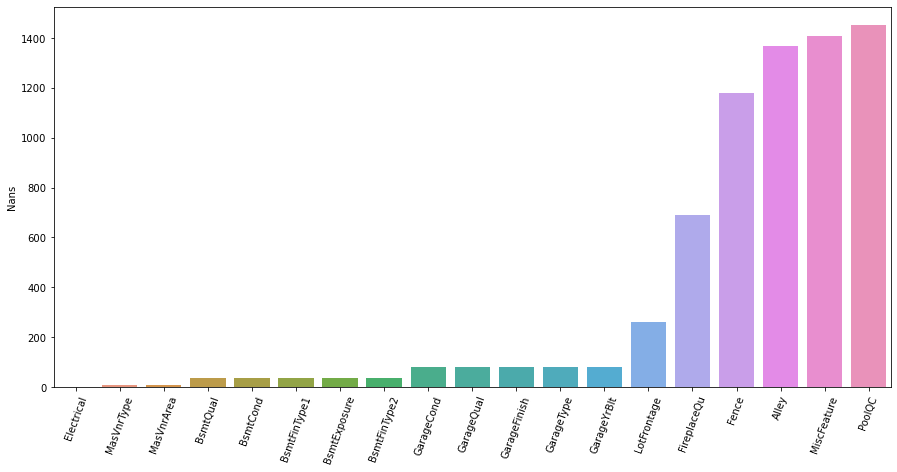

In [12]:
missing_train = missing_data(train_df)
missing_train

Vars with missing values:  33


Nans   Percent
TotalBsmtSF      1  0.000685
GarageArea       1  0.000685
GarageCars       1  0.000685
KitchenQual      1  0.000685
BsmtUnfSF        1  0.000685
BsmtFinSF2       1  0.000685
BsmtFinSF1       1  0.000685
SaleType         1  0.000685
Exterior1st      1  0.000685
Exterior2nd      1  0.000685
Functional       2  0.001371
Utilities        2  0.001371
BsmtHalfBath     2  0.001371
BsmtFullBath     2  0.001371
MSZoning         4  0.002742
MasVnrArea      15  0.010281
MasVnrType      16  0.010966
BsmtFinType2    42  0.028787
BsmtFinType1    42  0.028787
BsmtQual        44  0.030158
BsmtExposure    44  0.030158
BsmtCond        45  0.030843
GarageType      76  0.052090
GarageFinish    78  0.053461
GarageQual      78  0.053461
GarageCond      78  0.053461
GarageYrBlt     78  0.053461
LotFrontage    227  0.155586
FireplaceQu    730  0.500343
Fence         1169  0.801234
Alley         1352  0.926662
MiscFeature   1408  0.965045
PoolQC        1456  0.997944

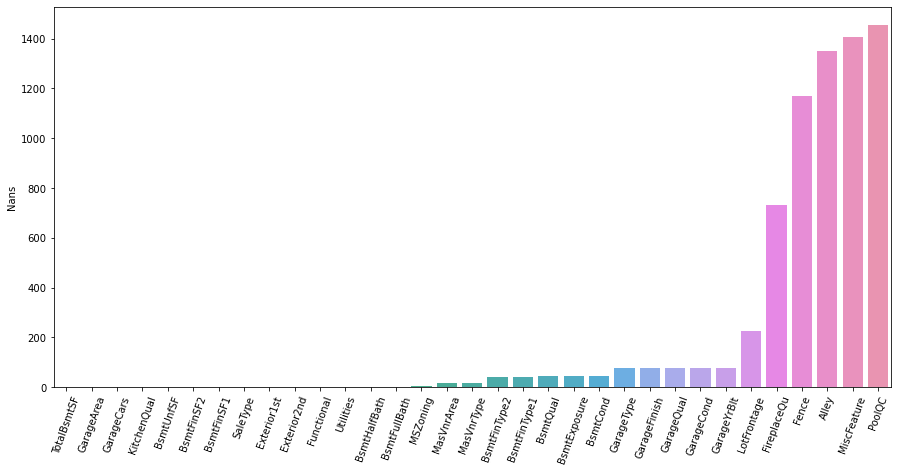

In [13]:
missing_test = missing_data(test_df)
missing_test

### 1.2 Drop columns with lot of Nans

In [14]:
def drop_nan_cols(df, missing):
    to_delete = missing[missing['Percent'] >= 0.15].index
    to_complete = missing[missing['Percent'] < 0.15].index
    
    clean_df = df.copy()
    clean_df.drop(to_delete, axis=1, inplace=True)
    
    return clean_df, to_complete, to_delete

In [15]:
# REMOVING FEATURES

train_clean_df, train_to_complete, to_delete = drop_nan_cols(train_df, missing_train)
test_clean_df, test_to_complete, to_delete = drop_nan_cols(test_df, missing_test)

In [16]:
print('Train after drop ', train_clean_df.isna().sum().sum())
print('Test after drop ', test_clean_df.isna().sum().sum())

Train after drop  609
Test after drop  658


### 1.3 Fill columns

In [17]:
def display_bars(df, columns, h):
    m = int(len(columns)/2) + 1
    fig, axs = plt.subplots(m, 2, figsize=(10, h))
    axs = axs.flatten()
    print(m)
    for i, ax_ in enumerate(axs):
        try:
            sns.countplot(data=df, x=columns[i], ax=axs[i])
        except IndexError:
            continue

7


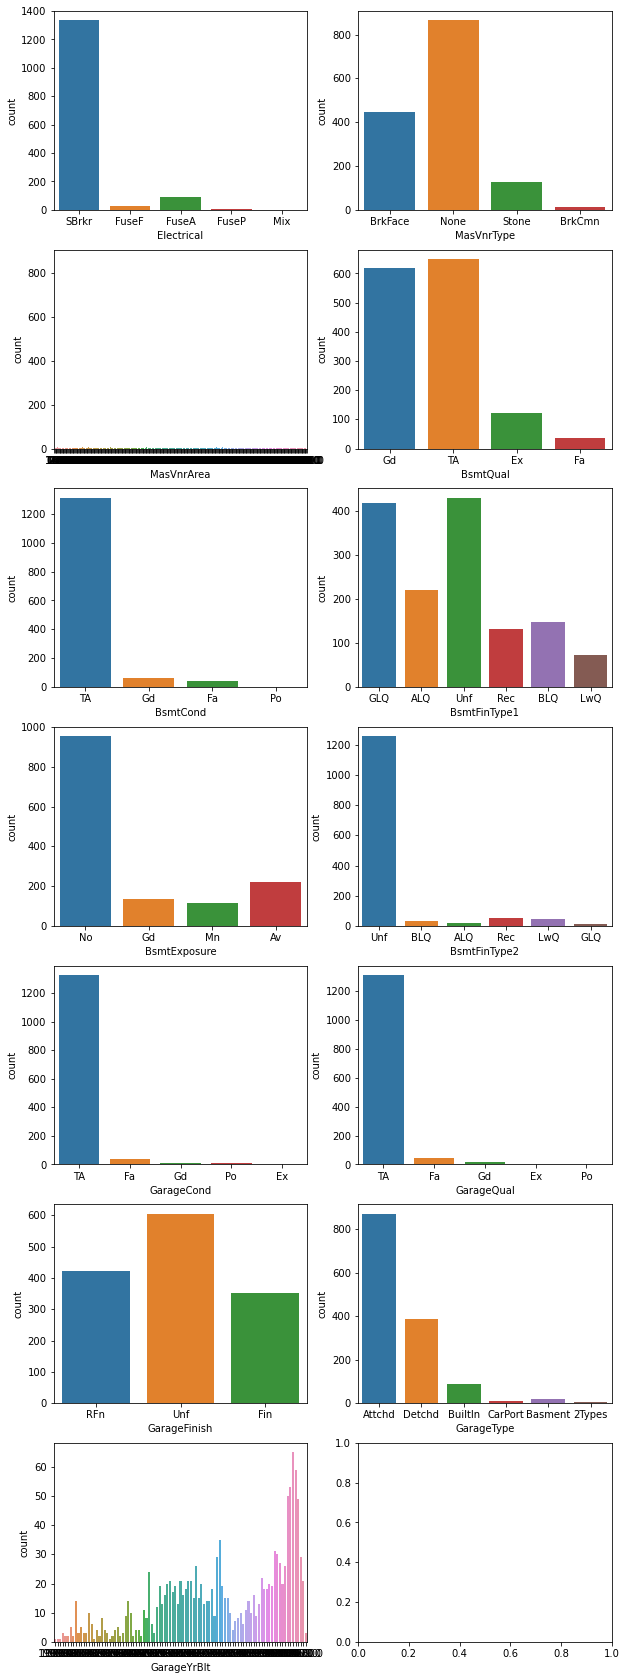

In [18]:
display_bars(train_clean_df, train_to_complete, 30)

14


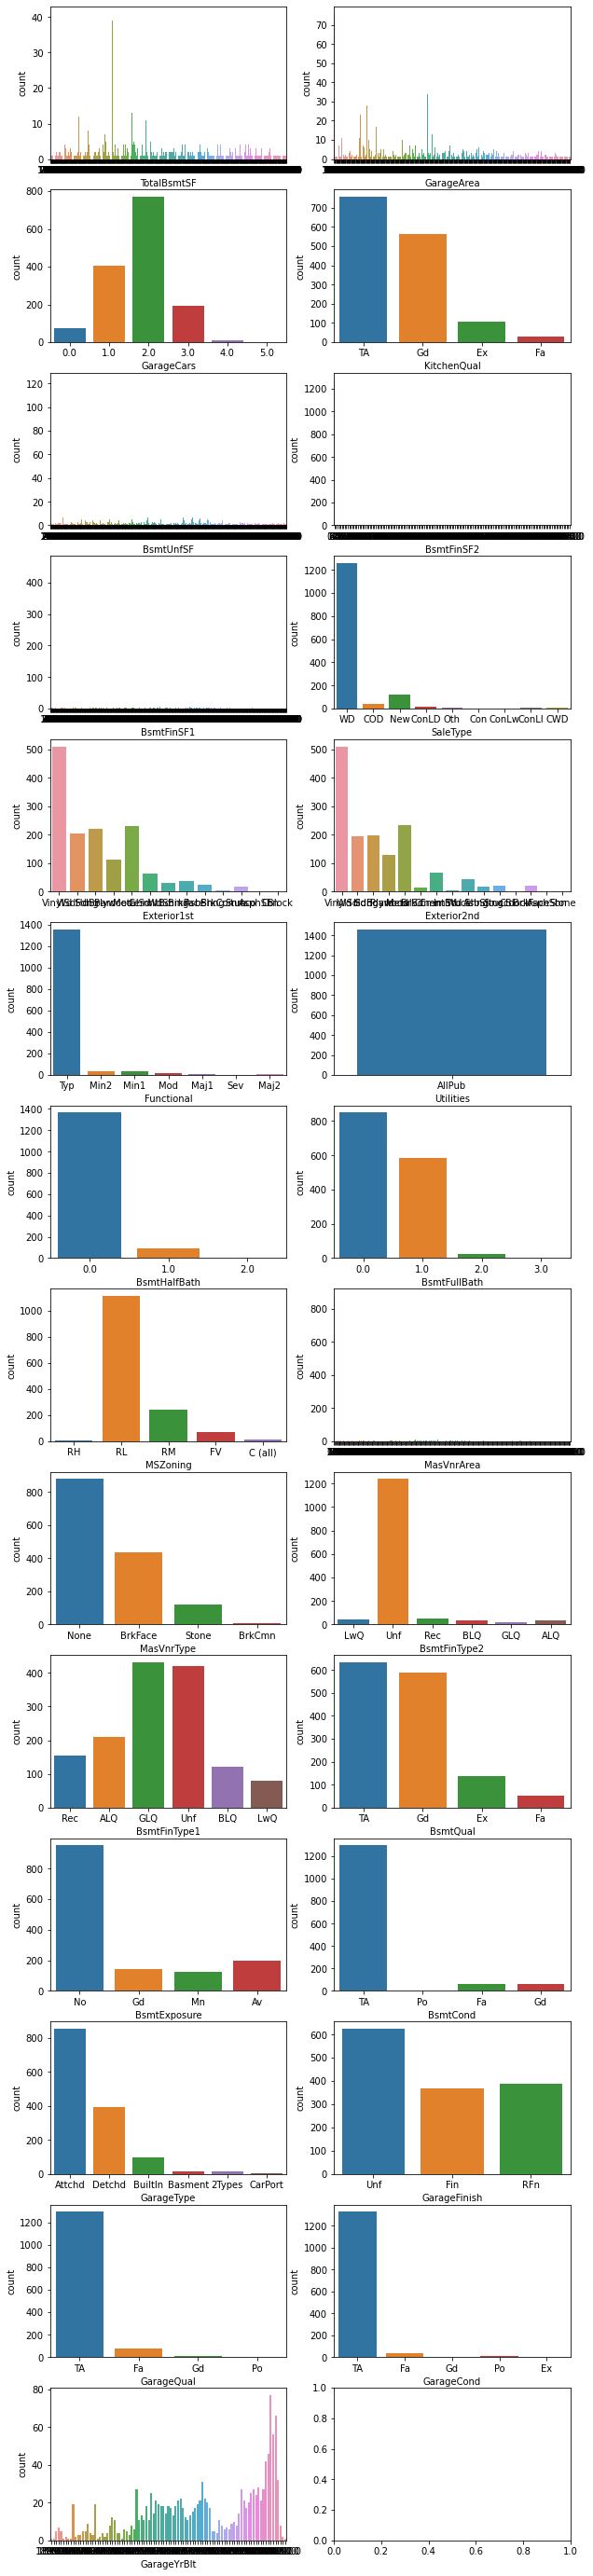

In [19]:
display_bars(test_clean_df, test_to_complete, 50)

In [19]:
### IMPUTE

imp_train_df = train_clean_df.fillna(method='bfill')
imp_test_df = test_clean_df.fillna(method='bfill')

In [20]:
print('Nans before imputing Train', train_clean_df.isna().sum().sum())
print('Nans before imputing Test', test_clean_df.isna().sum().sum())

print('-' * 30)

print('Nans after imputing Train', imp_train_df.isna().sum().sum())
print('Nans after imputing Test', imp_test_df.isna().sum().sum())

Nans before imputing Train 609
Nans before imputing Test 658
------------------------------
Nans after imputing Train 0
Nans after imputing Test 0


7


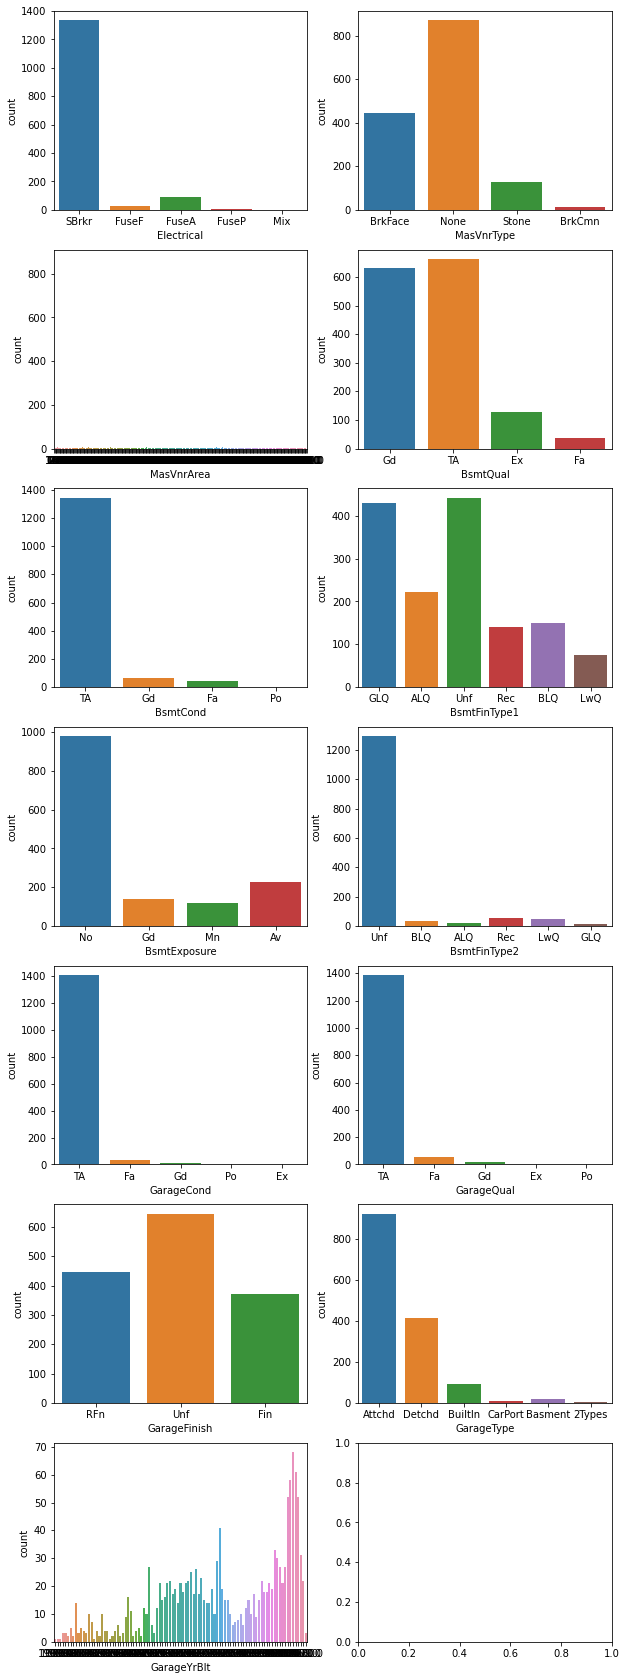

In [25]:
display_bars(imp_train_df, train_to_complete, 30)

14


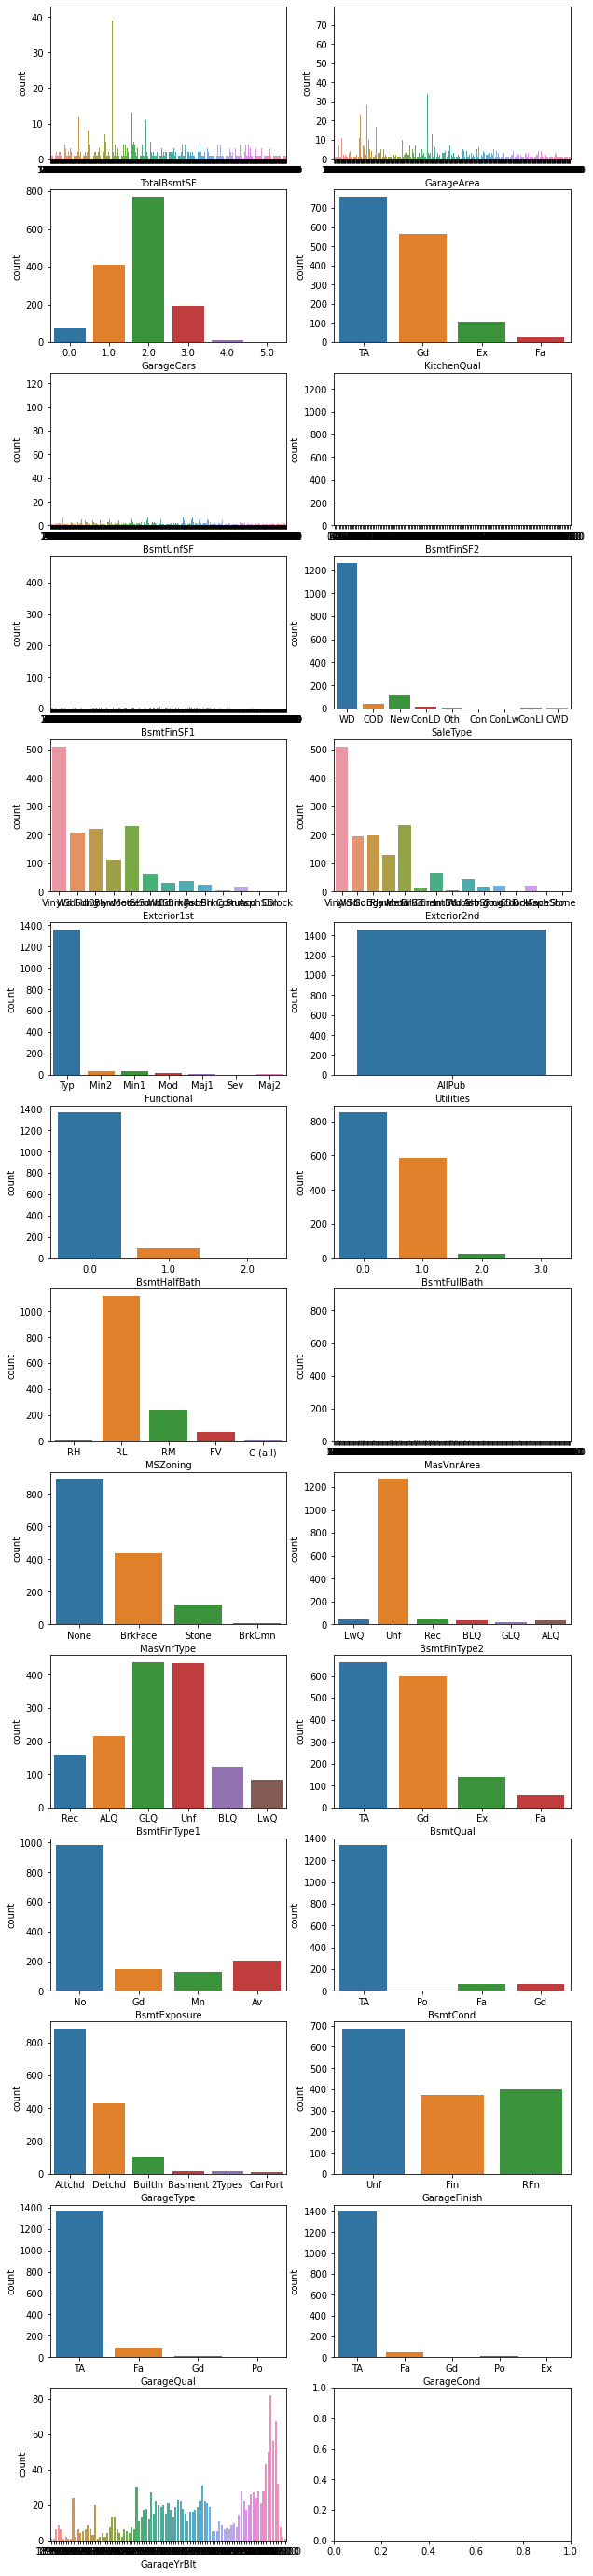

In [26]:
display_bars(imp_test_df, test_to_complete, 50)

## 2 Deal with feature types

In [21]:
df = imp_train_df.copy()
t_df = imp_test_df.copy()

df.set_index('Id', inplace=True)
t_df.set_index('Id', inplace=True)

In [22]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [23]:
nominal = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 
                  'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                  'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 
                  'SaleType', 'SaleCondition']
           

ordinal = ['MSSubClass', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 
               'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
               'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 
               'GarageQual', 'GarageCond', 'PavedDrive']
           

continuous = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'GarageArea',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
           
           
           
datetime = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

In [24]:
len(nominal + ordinal + continuous + datetime)

73

In [25]:
len(df.columns)

74

In [26]:
len(t_df.columns)

73

## 3 Visualisation

### 3.1 Target variable SalePrice

In [33]:
df[['SalePrice']].describe()

SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000

In [34]:
def plot_box_hist(column, size):    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(size))
    mean = column.mean()
    median = column.median()
    mode = column.mode().values[0]

    sns.boxplot(data=column, orient='h', ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')

    sns.histplot(data=column, ax=ax_hist, kde=True)
    ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_hist.axvline(median, color='g', linestyle='-', label="Median")
    ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

    ax_hist.legend()

    ax_box.set(xlabel='')
    plt.show()
    

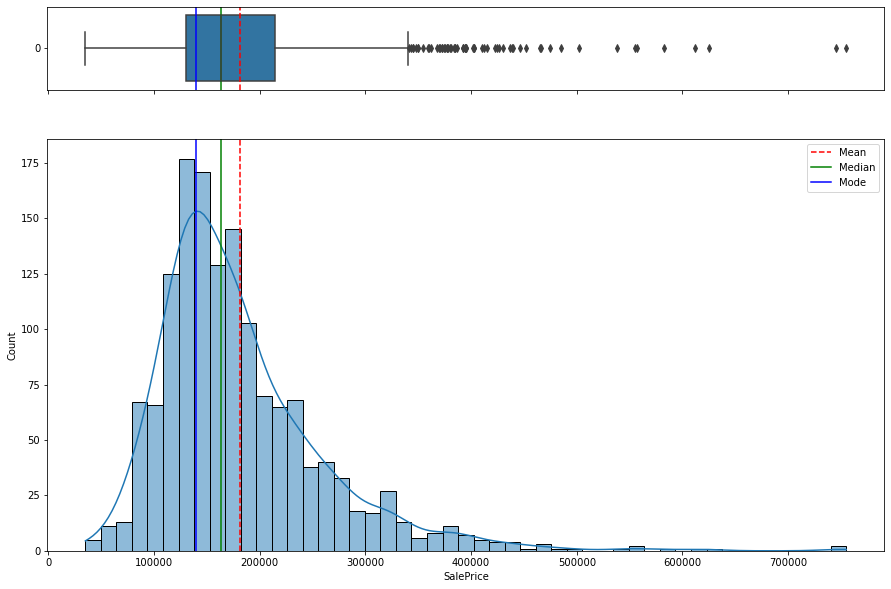

In [35]:
plot_box_hist(df['SalePrice'], (15,10))

In [36]:
print("Skewness: %f" % df['SalePrice'].skew()) #measure of the asymmetry of the probability distribution
print("Kurtosis: %f" % df['SalePrice'].kurt())  #measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution

Skewness: 1.882876
Kurtosis: 6.536282


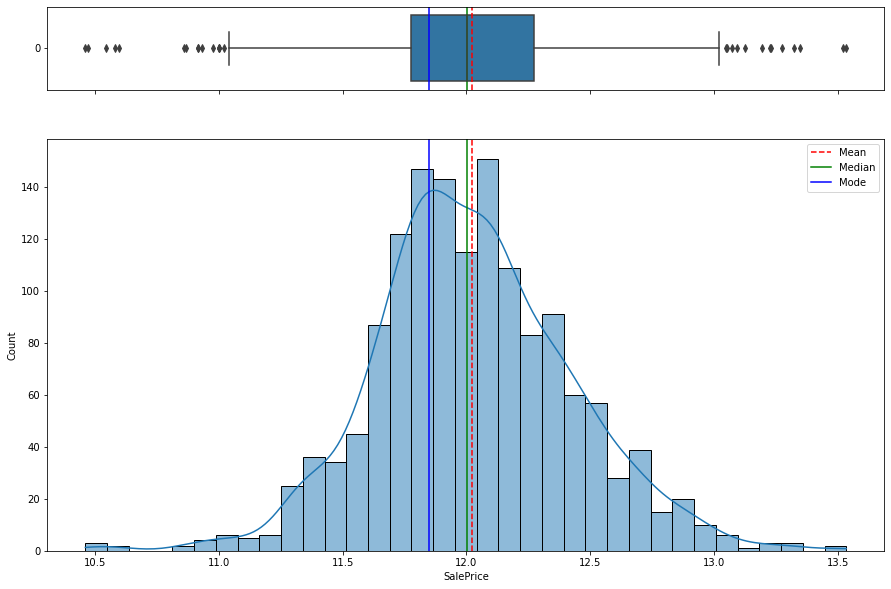

In [37]:
### apply log transformation
plot_box_hist(np.log(df['SalePrice']), (15,10))

In [38]:
print("Skewness: %f" % np.log(df['SalePrice']).skew()) #measure of the asymmetry of the probability distribution
print("Kurtosis: %f" % np.log(df['SalePrice']).kurt())  #measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution

Skewness: 0.121335
Kurtosis: 0.809532


In [39]:
# Shapiro normality test
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] #< 0.05
p = np.log(df[['SalePrice']]).apply(test_normality).values[0]
alpha = 0.05

print('p-value =', p)
if p > alpha:
    print('Normal distr (fail to reject H0)')
else:
    print('not Normal distr (reject H0)')

p-value = 1.1490678986092462e-07
not Normal distr (reject H0)


### 3.2 Categorical

28
56


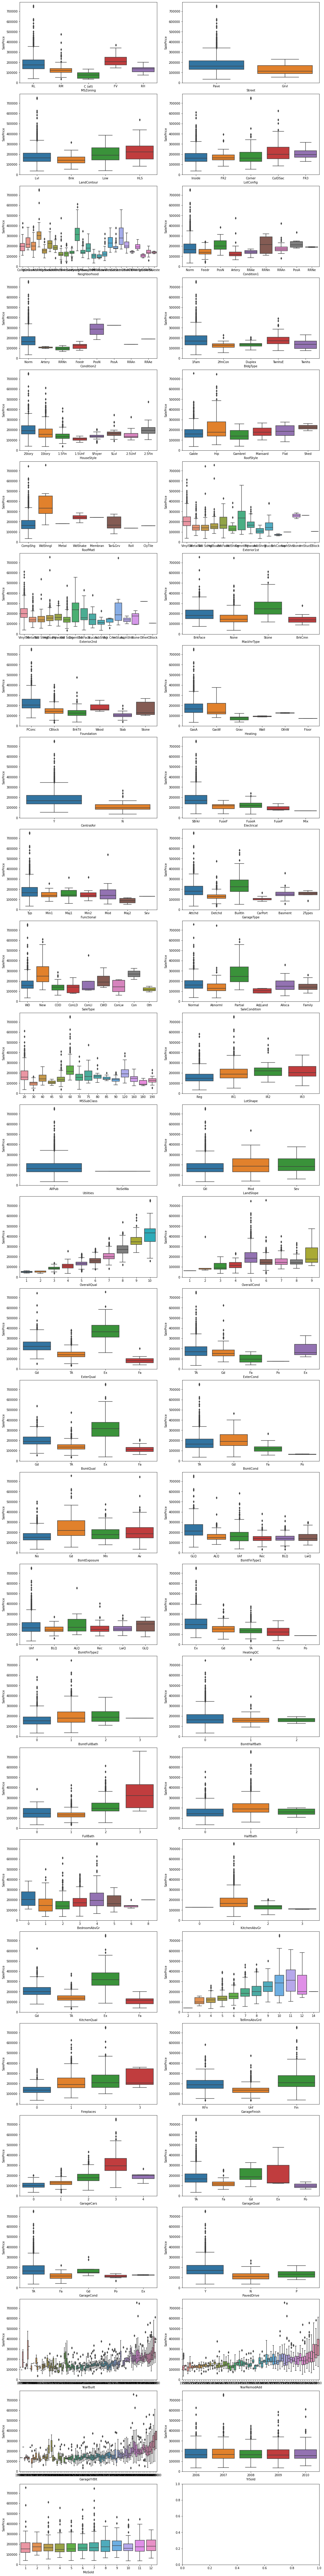

In [40]:
n = int(len((nominal + ordinal + datetime)[:])/2) + 1
fig, axs = plt.subplots(n, 2, figsize=(15,120), constrained_layout=True)
axs = axs.flatten()
print(n)
print(len(axs))
for i, ax_ in enumerate(axs):
    try:
        sns.boxplot(x=(nominal + ordinal + datetime)[i], y="SalePrice", data=df, ax = axs[i])
    except IndexError:
        continue

In [27]:
df['Utilities'].value_counts(), t_df['Utilities'].value_counts()

(AllPub    1459
 NoSeWa       1
 Name: Utilities, dtype: int64,
 AllPub    1459
 Name: Utilities, dtype: int64)

In [28]:
# REMOVING FEATURE
# drop Utilities!

df.drop('Utilities', inplace=True, axis=1)
t_df.drop('Utilities', inplace=True, axis=1)

ordinal.remove('Utilities')

In [29]:
len(nominal + ordinal + continuous + datetime), len(df.columns)

(72, 73)

### 3.3 Continuous

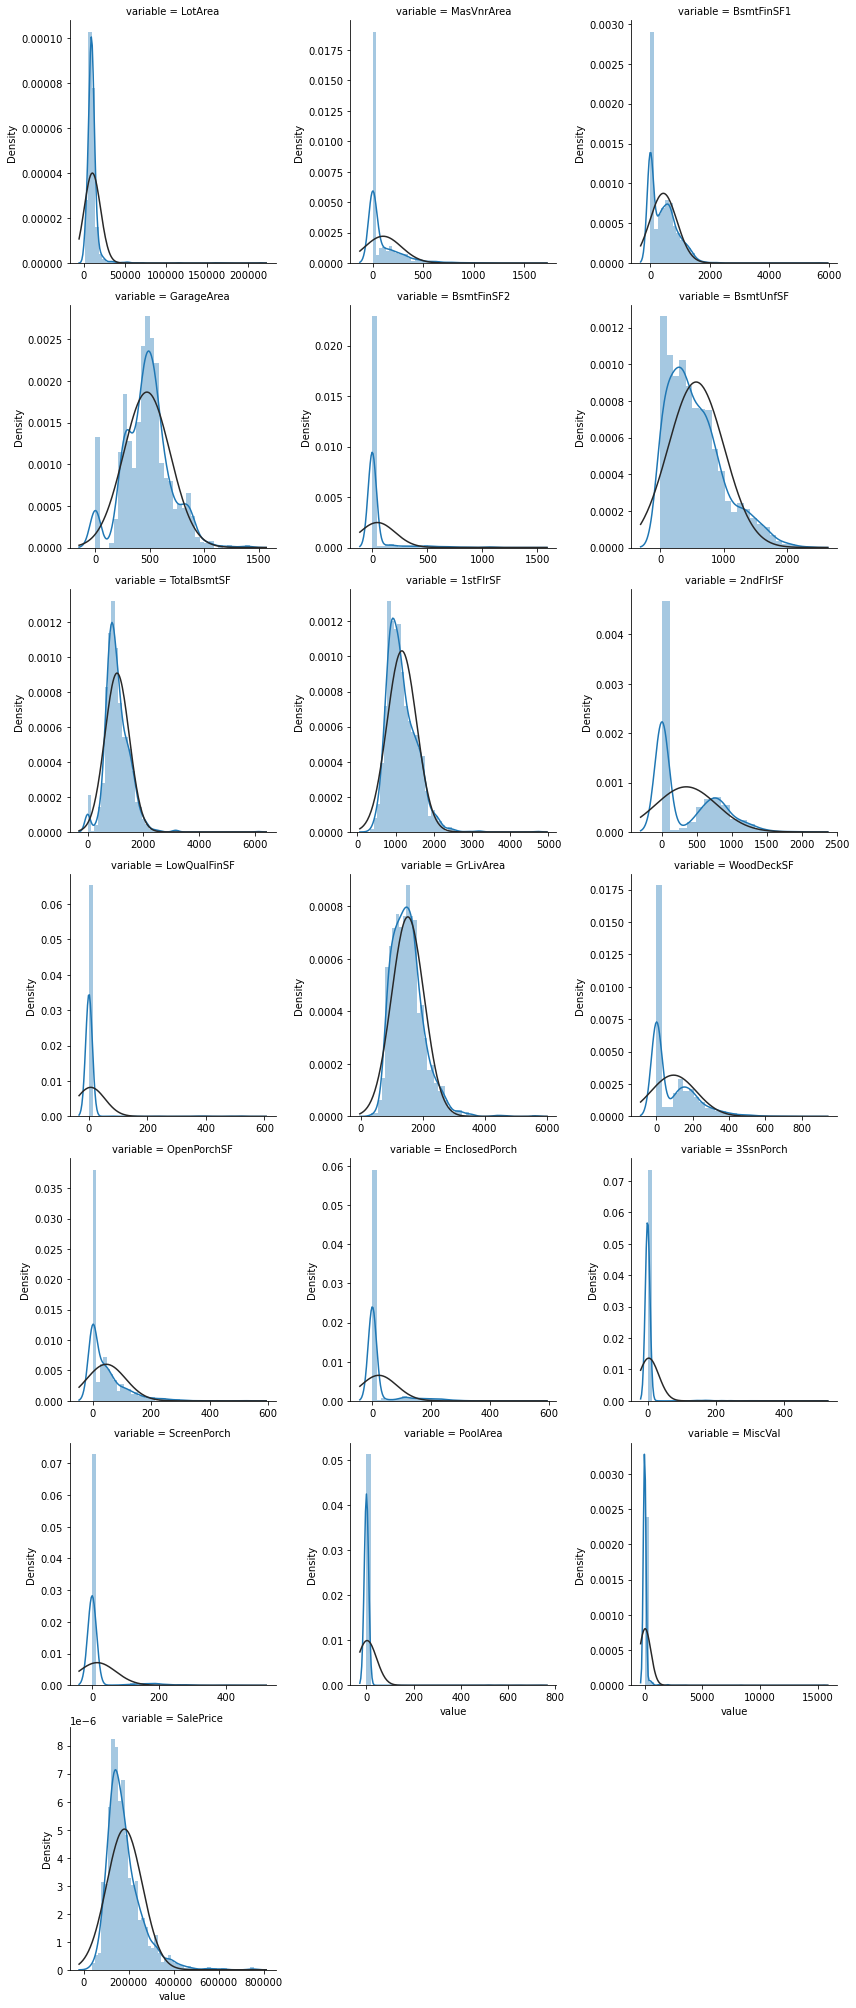

In [71]:
f = pd.melt(df, value_vars = continuous + ['SalePrice'])
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=4)
g.map(lambda _x, **kwargs: sns.distplot(_x, fit = stats.norm), 'value');

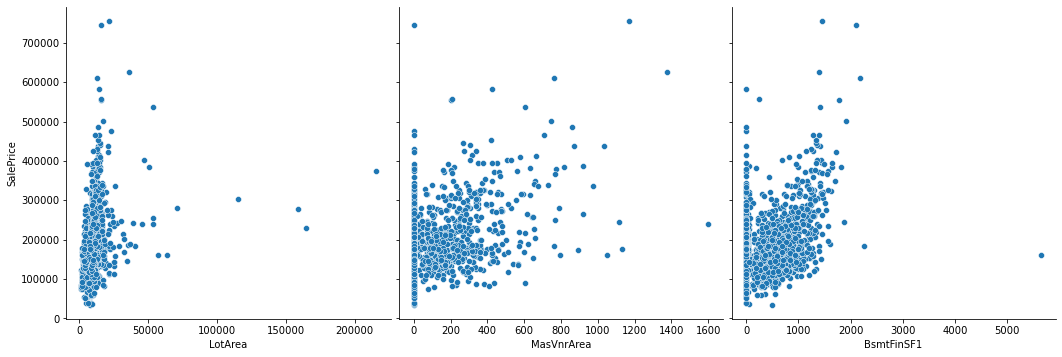

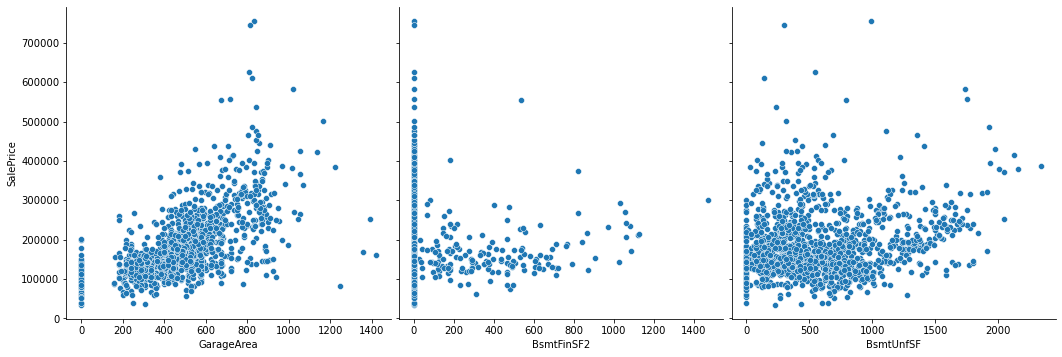

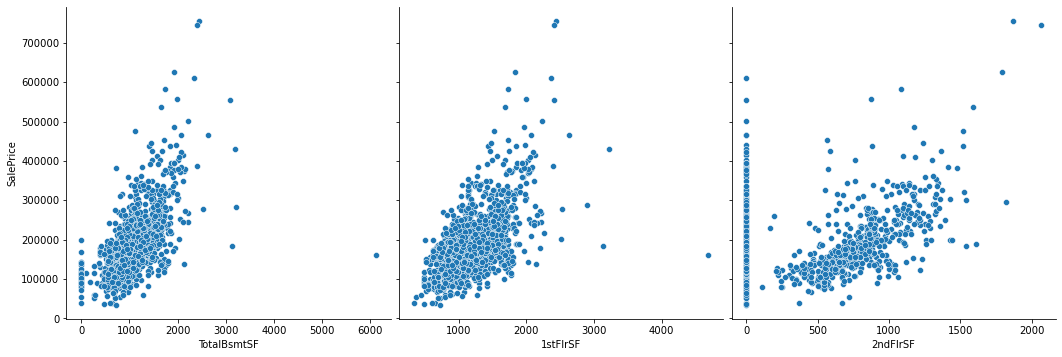

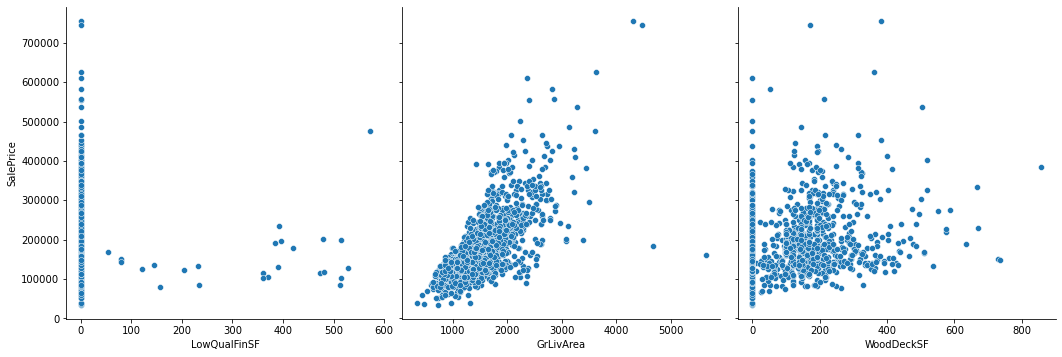

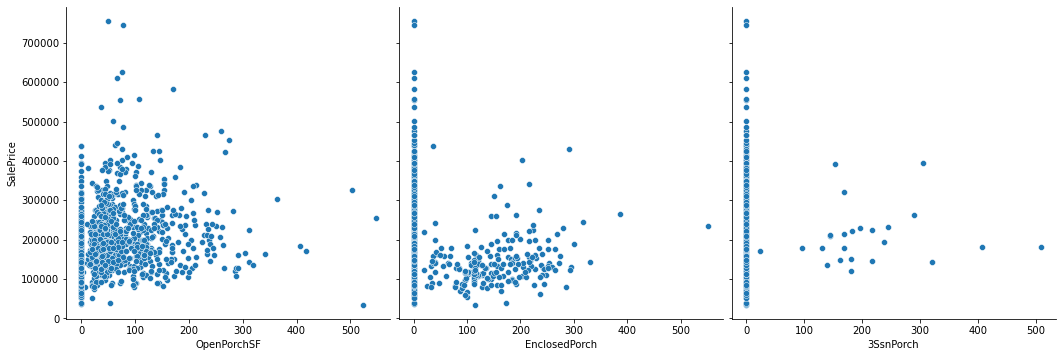

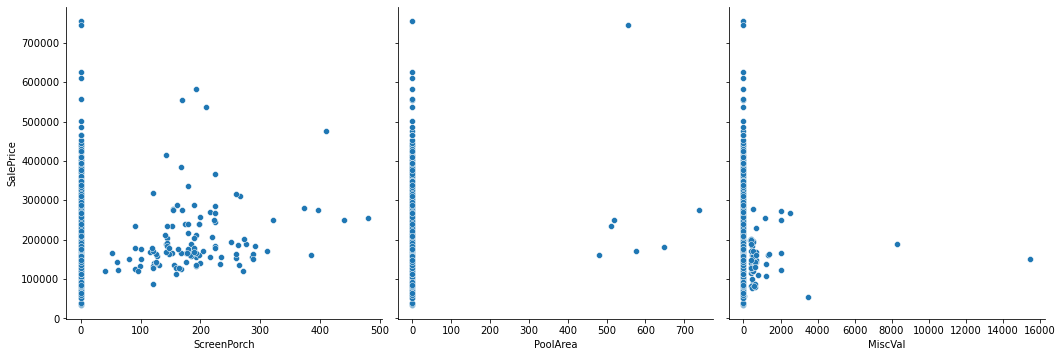

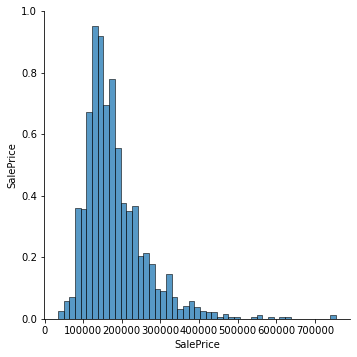

In [32]:
for i in range(0, len(continuous + ['SalePrice']), 3):
    sns.pairplot(data=df,
                      y_vars=['SalePrice'],
                      x_vars=(continuous + ['SalePrice'])[i:i+3],
                         height=5, aspect=1)

## 4 Transform and create features

In [169]:
df.head(3)

MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    Inside   
2           20       RL     9600   Pave      Reg         Lvl       FR2   
3           60       RL    11250   Pave      IR1         Lvl    Inside   

   LandSlope Neighborhood Condition1  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                    ...                                       
1        Gtl      CollgCr       Norm  ...             0         0           0   
2        Gtl      Veenker      Feedr  ...             0         0           0   
3        Gtl      CollgCr       Norm  ...             0         0           0   

    PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition SalePrice  
Id                                                                      
1          0        0       2    2008       WD        Normal    208500  
2          0        0       5    2007       WD        Normal    181500  
3          0        0       9    2008       WD        Normal    223500  

[3 rows x 73 columns]

In [170]:
t_df.head(3)

MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
Id                                                                         
1461          20       RH    11622   Pave      Reg         Lvl    Inside   
1462          20       RL    14267   Pave      IR1         Lvl    Corner   
1463          60       RL    13830   Pave      IR1         Lvl    Inside   

     LandSlope Neighborhood Condition1  ... OpenPorchSF EnclosedPorch  \
Id                                      ...                             
1461       Gtl        NAmes      Feedr  ...           0             0   
1462       Gtl        NAmes       Norm  ...          36             0   
1463       Gtl      Gilbert       Norm  ...          34             0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold YrSold SaleType  \
Id                                                                       
1461         0          120         0        0       6   2010       WD   
1462         0            0         0    12500       6   2010       WD   
1463         0            0         0        0       3   2010       WD   

     SaleCondition  
Id                  
1461        Normal  
1462        Normal  
1463        Normal  

[3 rows x 72 columns]

In [298]:
len(nominal + ordinal + continuous + datetime), len(df.columns)

(72, 73)

## Checkpoint1

In [133]:
t_df.isna().sum().sum()

0

In [30]:
df.shape, t_df.shape

((1460, 73), (1459, 72))

In [31]:
len(ordinal + datetime)

32

In [136]:
nominal1 = nominal.copy()
ordinal1 = (ordinal + datetime).copy()  ### YAERS TO ORDINAL!!!!!!!!!!!
continuous1 = continuous.copy()

df1 = df.copy()
t_df1 = t_df.copy()

In [137]:
len(ordinal1)

32

In [138]:
df1.shape, t_df1.shape

((1460, 73), (1459, 72))

In [139]:
# df1.reset_index(drop=True,inplace=True)
# df1.index.name = 'Id'
df1.head(3)

MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    Inside   
2           20       RL     9600   Pave      Reg         Lvl       FR2   
3           60       RL    11250   Pave      IR1         Lvl    Inside   

   LandSlope Neighborhood Condition1  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                    ...                                       
1        Gtl      CollgCr       Norm  ...             0         0           0   
2        Gtl      Veenker      Feedr  ...             0         0           0   
3        Gtl      CollgCr       Norm  ...             0         0           0   

    PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition SalePrice  
Id                                                                      
1          0        0       2    2008       WD        Normal    208500  
2          0        0       5    2007       WD        Normal    181500  
3          0        0       9    2008       WD        Normal    223500  

[3 rows x 73 columns]

In [140]:
len(nominal1 + ordinal1 + continuous1 + ['SalePrice']), len(df1.columns)

(73, 73)

In [141]:
t_df1.isna().sum().sum()

0

### 4.1 Encode Month

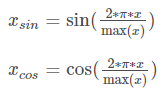

In [142]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
#     data.drop('MoSold', axis=1, inplace=True)
    
    return data

df1 = encode(df1, 'MoSold', max_val=12)
t_df1 = encode(t_df1, 'MoSold', max_val=12)

In [143]:
df1[['MoSold', 'MoSold_sin', 'MoSold_cos']].head(10)

MoSold    MoSold_sin    MoSold_cos
Id                                    
1        2  8.660254e-01  5.000000e-01
2        5  5.000000e-01 -8.660254e-01
3        9 -1.000000e+00 -1.836970e-16
4        2  8.660254e-01  5.000000e-01
5       12 -2.449294e-16  1.000000e+00
6       10 -8.660254e-01  5.000000e-01
7        8 -8.660254e-01 -5.000000e-01
8       11 -5.000000e-01  8.660254e-01
9        4  8.660254e-01 -5.000000e-01
10       1  5.000000e-01  8.660254e-01

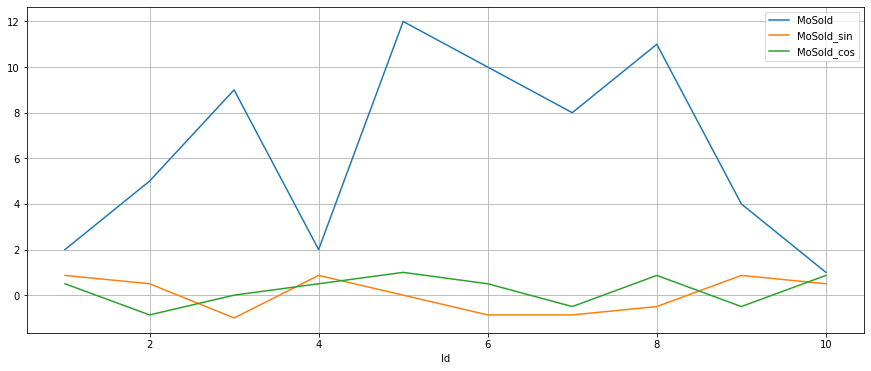

In [144]:
df1[['MoSold', 'MoSold_sin', 'MoSold_cos']].iloc[0:10].plot(grid=True, figsize=(15, 6));

In [145]:
df1.drop('MoSold', axis=1, inplace=True)
t_df1.drop('MoSold', axis=1, inplace=True)

ordinal1.remove('MoSold')
continuous1 = continuous1 + ['MoSold_sin', 'MoSold_cos']

In [146]:
len(nominal1 + ordinal1 + continuous1 + ['SalePrice']), len(df1.columns)

(74, 74)

In [149]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

### 4.2 Create features

In [150]:
df1.shape, t_df1.shape

((1460, 74), (1459, 73))

#### Renovated Yes/No

In [151]:
df1['YearRemodAdd'].dtypes, df1['YearBuilt'].dtypes

(dtype('int64'), dtype('int64'))

In [152]:
## YearBuilt: Original construction date
## YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

## to nominal

df1['RenovatedY/N'] = np.where(df1['YearRemodAdd'] == df1['YearBuilt'], 'no', 'yes')
t_df1['RenovatedY/N'] = np.where(t_df1['YearRemodAdd'] == t_df1['YearBuilt'], 'no', 'yes')

nominal1.append('RenovatedY/N')

In [153]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### Age when house was sold

In [154]:
df1['YrSold'].dtypes, df1['YearBuilt'].dtypes

(dtype('int64'), dtype('int64'))

In [155]:
## Age when house was sold

## to ordinal

df1['AgeWhenSold'] = df1['YrSold'] - df1['YearBuilt']
t_df1['AgeWhenSold'] = t_df1['YrSold'] - t_df1['YearBuilt']

ordinal1.append('AgeWhenSold')

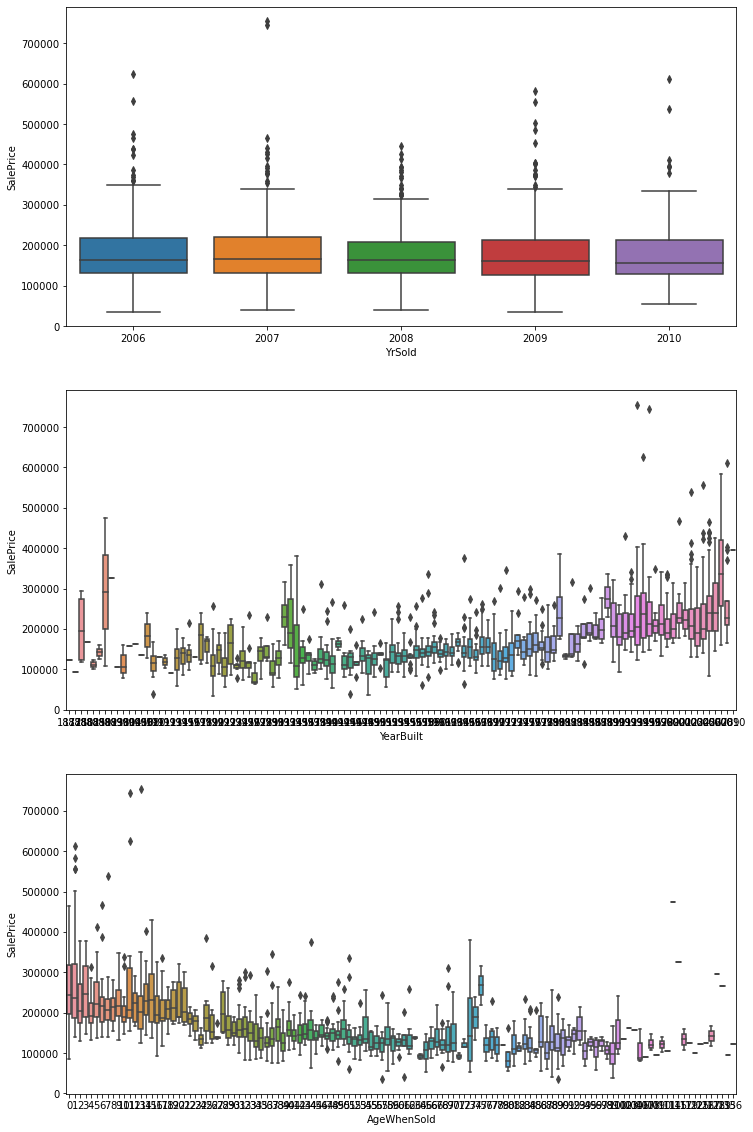

In [47]:
fig, axs = plt.subplots(3, 1, figsize=(12, 20))

sns.boxplot(data=df1, x='YrSold', y='SalePrice', ax=axs[0])

sns.boxplot(data=df1, x='YearBuilt', y='SalePrice', ax=axs[1])

sns.boxplot(data=df1, x='AgeWhenSold', y='SalePrice', ax=axs[2])

plt.show()

In [156]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### Total house area

In [157]:
df1['TotalBsmtSF'].dtypes, df1['GrLivArea'].dtypes, df1['1stFlrSF'].dtypes, df1['2ndFlrSF'].dtypes

(dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'))

In [158]:
## Total square in feet

# TotalBsmtSF: Total square feet of basement area
# GrLivArea: Above grade (ground) living area square feet
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet

df1['totSqFt'] = df1['TotalBsmtSF'] + df1['GrLivArea'] + df1['1stFlrSF'] + df1['2ndFlrSF']
t_df1['totSqFt'] = t_df1['TotalBsmtSF'] + t_df1['GrLivArea'] + t_df1['1stFlrSF'] + t_df1['2ndFlrSF']

continuous1.append('totSqFt')

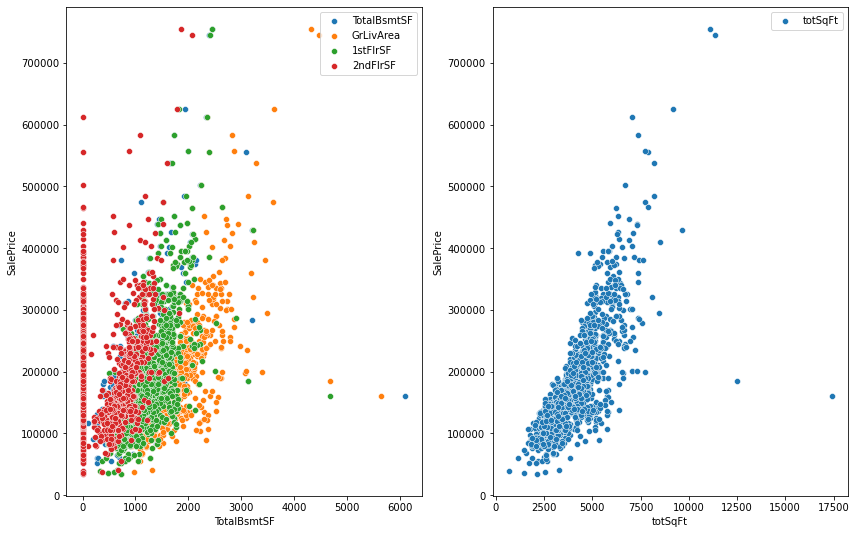

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14,9))

sns.scatterplot(data=df1, x='TotalBsmtSF', y='SalePrice', ax=axs[0], label='TotalBsmtSF')
sns.scatterplot(data=df1, x='GrLivArea', y='SalePrice', ax=axs[0], label='GrLivArea')
sns.scatterplot(data=df1, x='1stFlrSF', y='SalePrice', ax=axs[0], label='1stFlrSF')
sns.scatterplot(data=df1, x='2ndFlrSF', y='SalePrice', ax=axs[0], label='2ndFlrSF')

sns.scatterplot(data=df1, x='totSqFt', y='SalePrice', ax=axs[1], label = 'totSqFt')

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")

plt.show()

In [159]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### Total bathrooms

In [160]:
df1['FullBath'].dtypes, df1['HalfBath'].dtypes, df1['BsmtFullBath'].dtypes, df1['BsmtHalfBath'].dtypes

(dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'))

In [161]:
## Total baths

# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade

df1['totBath'] = df1['FullBath'] + 0.5*df1['HalfBath'] + df1['BsmtFullBath'] + 0.5*df1['BsmtHalfBath']
t_df1['totBath'] = t_df1['FullBath'] + 0.5*t_df1['HalfBath'] + t_df1['BsmtFullBath'] + 0.5*t_df1['BsmtHalfBath']

ordinal1.append('totBath')

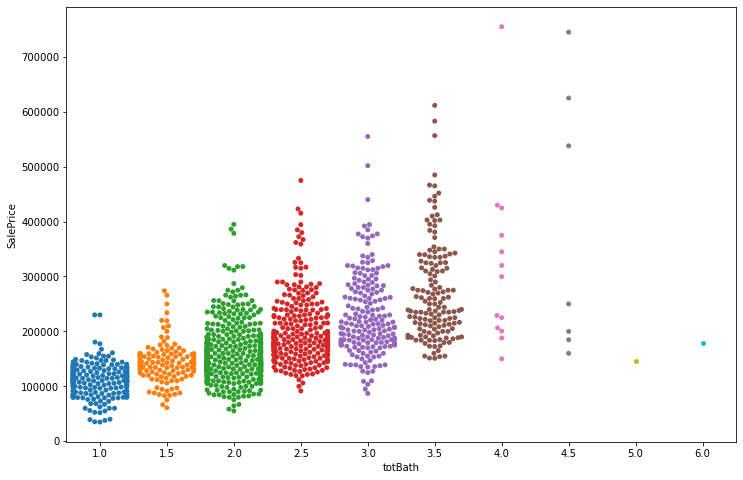

In [45]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x="totBath", y="SalePrice", data=df1);

In [162]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### Total basement finished

In [163]:
df1[['BsmtFinSF1', 'BsmtFinSF2']].dtypes

BsmtFinSF1    int64
BsmtFinSF2    int64
dtype: object

In [164]:
## Total basement finished

# BsmtFinSF1: Готовые квадратные футы типа 1
# BsmtFinSF2: Готовые квадратные футы типа 2

df1['TotalBsmtFinSF'] = df1['BsmtFinSF1'] + df1['BsmtFinSF2']
t_df1['TotalBsmtFinSF'] = t_df1['BsmtFinSF1'] + t_df1['BsmtFinSF2']

continuous1.append('TotalBsmtFinSF')

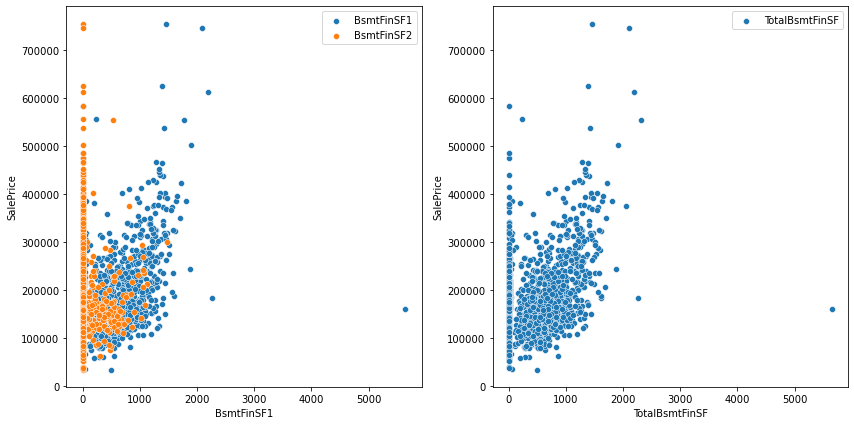

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(14,7))

sns.scatterplot(data=df1, x='BsmtFinSF1', y='SalePrice', ax=axs[0], label='BsmtFinSF1')
sns.scatterplot(data=df1, x='BsmtFinSF2', y='SalePrice', ax=axs[0], label='BsmtFinSF2')

sns.scatterplot(data=df1, x='TotalBsmtFinSF', y='SalePrice', ax=axs[1], label = 'TotalBsmtFinSF')

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")

plt.show()

In [165]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### Finished Basement SF

In [166]:
df1['TotalBsmtSF'].dtypes, df1['BsmtUnfSF'].dtypes

(dtype('int64'), dtype('int64'))

In [167]:
## Finished Basement SF

# BsmtUnfSF: Незавершенные квадратные футы подвала
# TotalBsmtSF: Общая площадь подвала в квадратных футах

df1['BsmtFinSF'] = df1['TotalBsmtSF'] - df1['BsmtUnfSF']
t_df1['BsmtFinSF'] = t_df1['TotalBsmtSF'] - t_df1['BsmtUnfSF']

continuous1.append('BsmtFinSF')

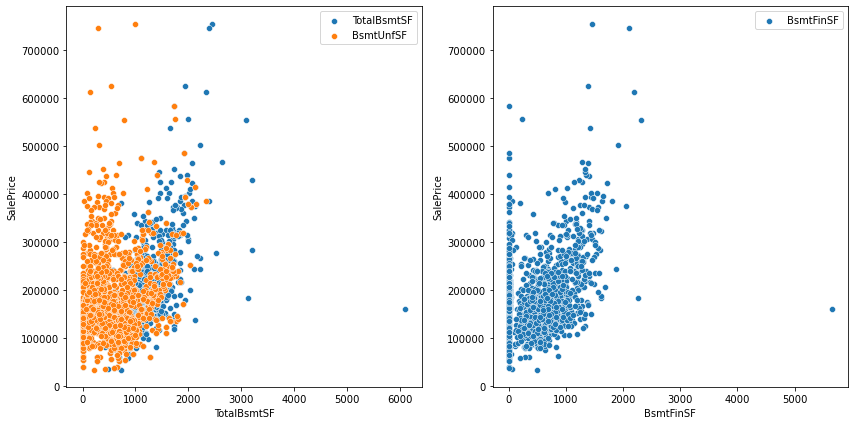

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(14,7))

sns.scatterplot(data=df1, x='TotalBsmtSF', y='SalePrice', ax=axs[0], label='TotalBsmtSF')
sns.scatterplot(data=df1, x='BsmtUnfSF', y='SalePrice', ax=axs[0], label='BsmtUnfSF')

sns.scatterplot(data=df1, x='BsmtFinSF', y='SalePrice', ax=axs[1], label = 'BsmtFinSF')

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")

plt.show()

In [168]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### 2 Floor availability

In [169]:
## Second Floor availability

# 2ndFlrSF: Площадь второго этажа в квадратных футах

df1['2ndFloorY/N'] = df1['2ndFlrSF'].apply(lambda x: 0 if x == 0 else 1)
t_df1['2ndFloorY/N'] = t_df1['2ndFlrSF'].apply(lambda x: 0 if x == 0 else 1)

nominal1.append('2ndFloorY/N')

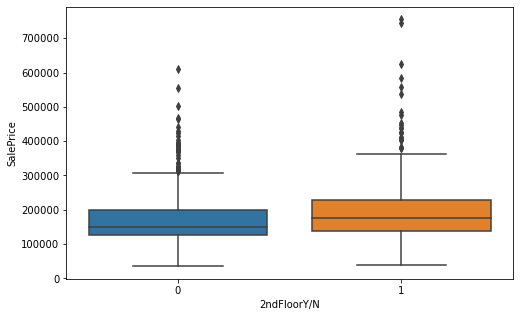

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="2ndFloorY/N", y="SalePrice", data=df1);

In [170]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### Other rooms

In [171]:
## Other rooms(except kitchen and bedroom)

# BedroomAbvGr: спальни выше уровня (НЕ включают спальни в подвале)
# KitchenAbvGr: Кухни выше уровня
# TotRmsAbvGrd: Общее количество комнат выше уровня (без ванных комнат)

df1['OtherRooms'] = df1['TotRmsAbvGrd'] - df1['BedroomAbvGr'] - df1['KitchenAbvGr']
t_df1['OtherRooms'] = t_df1['TotRmsAbvGrd'] - t_df1['BedroomAbvGr'] - t_df1['KitchenAbvGr']

ordinal1.append('OtherRooms')

In [172]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### Average Room SF

In [173]:
## Average Room Area

# GrLivArea: квадратные футы жилой площади надземного уровня
# TotRmsAbvGrd: Общее количество комнат выше уровня (без ванных комнат)
    
df1['AverageRoomSF'] = df1['GrLivArea'] / df1['TotRmsAbvGrd']
t_df1['AverageRoomSF'] = t_df1['GrLivArea'] / t_df1['TotRmsAbvGrd']

continuous1.append('AverageRoomSF')

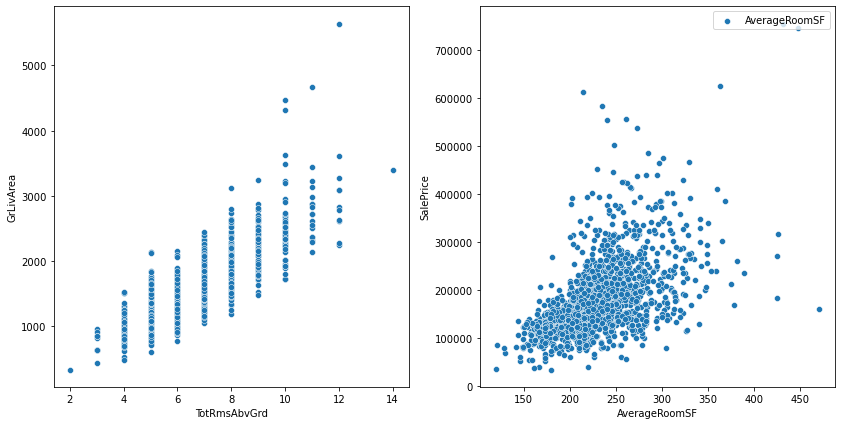

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(14,7))
sns.scatterplot(data=df1, x='TotRmsAbvGrd', y='GrLivArea', ax=axs[0])

sns.scatterplot(data=df1, x='AverageRoomSF', y='SalePrice', ax=axs[1], label = 'AverageRoomSF')

axs[1].legend(loc="upper right")
plt.show()

In [174]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### Garage space

In [175]:
## Garage space for each car

# GarageCars: Размер гаража по вместимости машины
# GarageArea: Размер гаража в квадратных футах.

df1['GarageSpaceForCar'] = df1['GarageArea'] / df1['GarageCars']
t_df1['GarageSpaceForCar'] = t_df1['GarageArea'] / t_df1['GarageCars']

continuous1.append('GarageSpaceForCar')

In [176]:
df1[['GarageArea', 'GarageCars', 'GarageSpaceForCar']][df1['GarageArea'] == 0].head(3)

GarageArea  GarageCars  GarageSpaceForCar
Id                                           
40           0           0                NaN
49           0           0                NaN
79           0           0                NaN

In [177]:
df1['GarageSpaceForCar'].isna().sum()

81

In [178]:
df1['GarageSpaceForCar'].fillna(0, inplace=True)

In [180]:
t_df1['GarageSpaceForCar'].fillna(0, inplace=True)

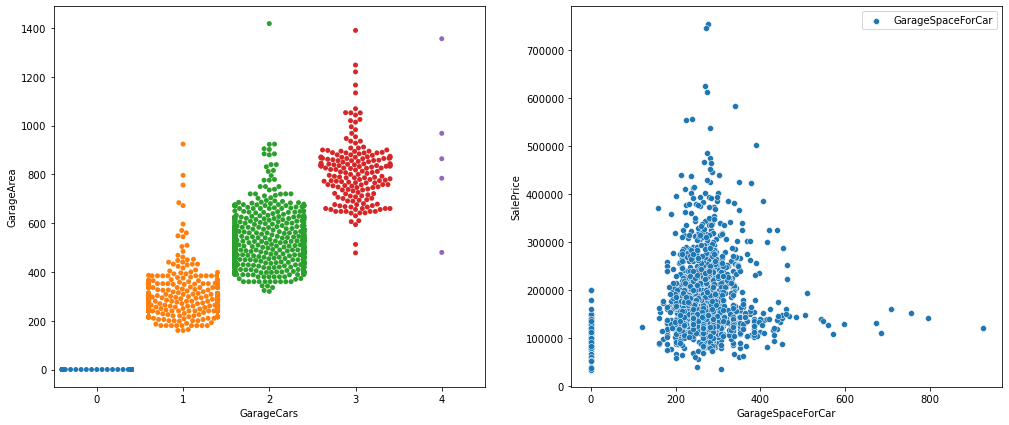

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(17,7))
sns.swarmplot(data=df1, y='GarageArea', x='GarageCars', ax=axs[0])

sns.scatterplot(data=df1, x='GarageSpaceForCar', y='SalePrice', ax=axs[1], label = 'GarageSpaceForCar')

axs[1].legend(loc="upper right")
plt.show()

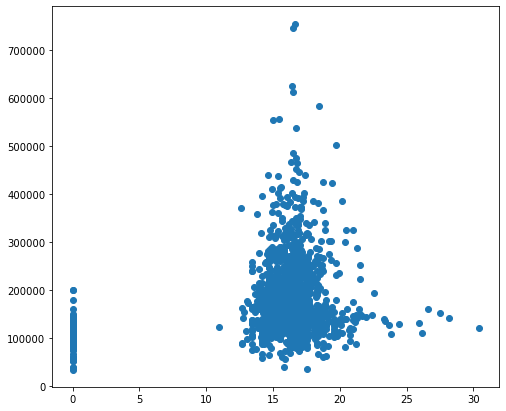

In [66]:
plt.figure(figsize=(8,7))
plt.scatter(x = np.sqrt(df1['GarageSpaceForCar']), y = df1['SalePrice']);
# plt.hist((df['GarageSpaceForCar'] - df['GarageSpaceForCar'].mean()) / df['GarageSpaceForCar'].std(), bins=30);

In [181]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### WoodDeck + openPorchSF

In [182]:
df1[['WoodDeckSF', 'OpenPorchSF']].head(5)

WoodDeckSF  OpenPorchSF
Id                         
1            0           61
2          298            0
3            0           42
4            0           35
5          192           84

In [183]:
df1['WoodDeckOpenPorch'] = df1['WoodDeckSF'] + df1['OpenPorchSF']
t_df1['WoodDeckOpenPorch'] = t_df1['WoodDeckSF'] + t_df1['OpenPorchSF']

continuous1.append('WoodDeckOpenPorch')

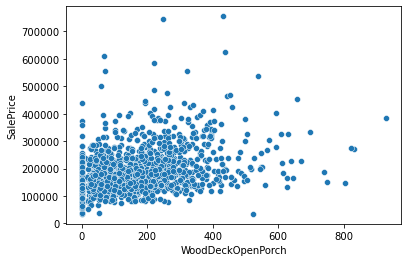

In [69]:
sns.scatterplot(data = df1, x='WoodDeckOpenPorch', y = 'SalePrice');

In [184]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### Total Porch

In [70]:
# OpenPorchSF: Площадь открытой веранды в квадратных футах

# EnclosedPorch: Площадь крыльца в квадратных футах.

# 3SsnPorch: Площадь крыльца на три сезона в квадратных футах.

# ScreenPorch: Площадь крыльца экрана в квадратных футах.

In [187]:
df1['TotalPorchSF'] = df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['3SsnPorch'] + df1['ScreenPorch']
t_df1['TotalPorchSF'] = t_df1['OpenPorchSF'] + t_df1['EnclosedPorch'] + t_df1['3SsnPorch'] + t_df1['ScreenPorch']

continuous1.append('TotalPorchSF')

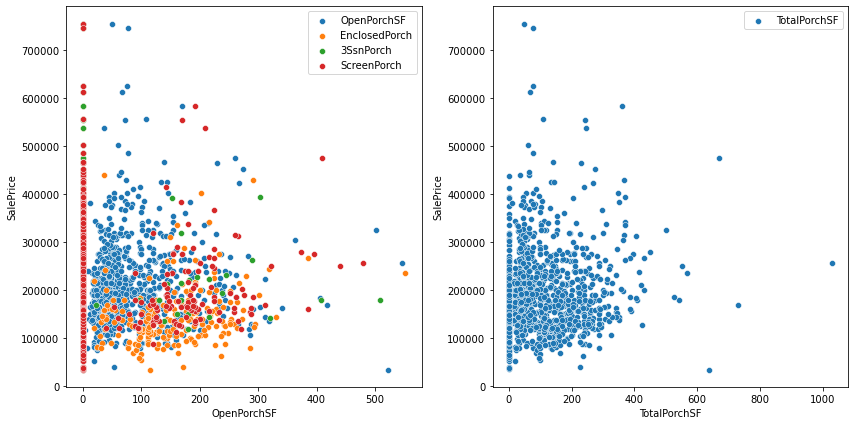

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(14,7))

sns.scatterplot(data=df1, x='OpenPorchSF', y='SalePrice', ax=axs[0], label='OpenPorchSF')
sns.scatterplot(data=df1, x='EnclosedPorch', y='SalePrice', ax=axs[0], label='EnclosedPorch')
sns.scatterplot(data=df1, x='3SsnPorch', y='SalePrice', ax=axs[0], label='3SsnPorch')
sns.scatterplot(data=df1, x='ScreenPorch', y='SalePrice', ax=axs[0], label='ScreenPorch')

sns.scatterplot(data=df1, x='TotalPorchSF', y='SalePrice', ax=axs[1], label = 'TotalPorchSF')

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")

plt.show()

In [73]:
(df1['TotalPorchSF'] == 0).sum()

458

In [188]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

#### No porch

In [189]:
df1['PorchY/N'] = df1['TotalPorchSF'].apply(lambda x: 0 if x == 0 else 1)
t_df1['PorchY/N'] = t_df1['TotalPorchSF'].apply(lambda x: 0 if x == 0 else 1)

nominal1.append('PorchY/N')

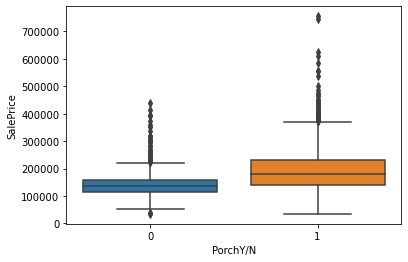

In [75]:
sns.boxplot(data=df1, x='PorchY/N', y='SalePrice');

In [76]:
len(nominal1 + ordinal1 + continuous1 + ['SalePrice']), len(df1.columns)

(87, 87)

In [77]:
list(set(df1.columns) - set(nominal1 + ordinal1 + continuous1 + ['SalePrice']))

[]

In [190]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

## Checkpoint2

In [191]:
df1.isna().sum().sum(), t_df1.isna().sum().sum()

(0, 0)

In [192]:
df1.shape, t_df1.shape

((1460, 87), (1459, 86))

In [193]:
nominal2 = nominal1.copy()
ordinal2 = ordinal1.copy()  ### YAERS TO ORDINAL!!!!!!!!!!!
continuous2 = continuous1.copy()

df2 = df1.copy()
t_df2 = t_df1.copy()

In [194]:
df2.head(3)

MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    Inside   
2           20       RL     9600   Pave      Reg         Lvl       FR2   
3           60       RL    11250   Pave      IR1         Lvl    Inside   

   LandSlope Neighborhood Condition1  ... totBath TotalBsmtFinSF BsmtFinSF  \
Id                                    ...                                    
1        Gtl      CollgCr       Norm  ...     3.5            706       706   
2        Gtl      Veenker      Feedr  ...     2.5            978       978   
3        Gtl      CollgCr       Norm  ...     3.5            486       486   

    2ndFloorY/N  OtherRooms  AverageRoomSF  GarageSpaceForCar  \
Id                                                              
1             1           4     213.750000              274.0   
2             0           2     210.333333              230.0   
3             1           2     297.666667              304.0   

   WoodDeckOpenPorch TotalPorchSF PorchY/N  
Id                                          
1                 61           61        1  
2                298            0        0  
3                 42           42        1  

[3 rows x 87 columns]

In [195]:
# df_.reset_index(drop=True,inplace=True)
# df_.index.name = 'Id'
# df_.head(3)

In [196]:
len(nominal2 + ordinal2 + continuous2 + ['SalePrice']), len(df2.columns)

(87, 87)

In [197]:
df2.isna().sum().sum(), t_df2.isna().sum().sum()

(0, 0)

#### Numerical to categorical

### *Wathch Outliers*

In [198]:
def outliers_info(data, feature):
    Q1 = data[feature].quantile(0.2)
    Q3 = data[feature].quantile(0.8)
    IQR = Q3 - Q1
    outl = ((data[feature] < (Q1[feature] - 1.5 * IQR[feature])) 
            | (data[feature] > (Q3[feature] + 1.5 * IQR[feature]))).sum()
    q = pd.concat([Q1, IQR, Q3], axis=1)
    q.columns = ['Q1', 'IQR', 'Q3']
    q['outl'] = outl
    print('Distinct outliers: ', sum(outl))
    rows_to_drop=data[feature].shape[0] - data[feature][~((data[feature] < (Q1[feature] - 1.5 * IQR[feature])) 
                                               | (data[feature] > (Q3[feature] + 1.5 * IQR[feature]))).any(axis=1)].shape[0]
    print('Rows with outliers outliers to drop: ',rows_to_drop)
    print('Data rows: ', data.shape[0])
    print('Remaining rows: ',  data.shape[0] - rows_to_drop)

    return q

In [199]:
outliers_info(df2, continuous2+['SalePrice'])

Distinct outliers:  1035
Rows with outliers outliers to drop:  687
Data rows:  1460
Remaining rows:  773


Q1            IQR             Q3  outl
LotArea              7078.400000    5127.400000   12205.800000    54
MasVnrArea              0.000000     206.200000     206.200000    54
BsmtFinSF1              0.000000     806.400000     806.400000     4
GarageArea            295.600000     324.600000     620.200000     7
BsmtFinSF2              0.000000       0.000000       0.000000   167
BsmtUnfSF             172.000000     724.000000     896.000000     6
TotalBsmtSF           755.800000     635.400000    1391.200000    10
1stFlrSF              848.000000     634.400000    1482.400000     8
2ndFlrSF                0.000000     796.200000     796.200000     1
LowQualFinSF            0.000000       0.000000       0.000000    26
GrLivArea            1066.600000     802.400000    1869.000000    18
WoodDeckSF              0.000000     192.000000     192.000000    20
OpenPorchSF             0.000000      83.200000      83.200000    48
EnclosedPorch           0.000000       0.000000       0.000000   208
3SsnPorch               0.000000       0.000000       0.000000    24
ScreenPorch             0.000000       0.000000       0.000000   116
PoolArea                0.000000       0.000000       0.000000     7
MiscVal                 0.000000       0.000000       0.000000    52
MoSold_sin             -0.500000       1.366025       0.866025     0
MoSold_cos             -0.866025       1.366025       0.500000     0
totSqFt              3015.000000    1974.000000    4989.000000    11
TotalBsmtFinSF          0.000000     879.200000     879.200000     3
BsmtFinSF               0.000000     879.200000     879.200000     3
AverageRoomSF         192.000000      71.750000     263.750000    10
GarageSpaceForCar     220.000000      80.600000     300.600000   115
WoodDeckOpenPorch       0.000000     254.000000     254.000000    11
TotalPorchSF            0.000000     160.000000     160.000000    18
SalePrice          124000.000000  106000.000000  230000.000000    34

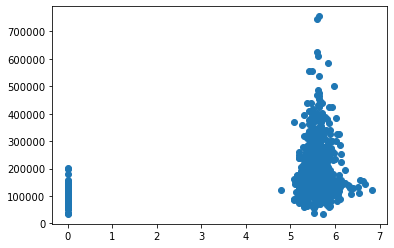

In [200]:
plt.scatter(x = np.log(df2['GarageSpaceForCar']+1), y = df2['SalePrice']);

In [201]:
to_cat_arr = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'MiscVal', 'PoolArea']

### to categrical: 
def to_cat(feature, dataframe, listdrop = True):
    dataframe[feature + '_cat'] = dataframe[feature].apply(lambda x: 0 if x == 0 else 1)
    dataframe.drop(feature, axis=1, inplace=True)
    if listdrop:
        continuous2.remove(feature)
        nominal2.append(feature + '_cat')
    else:
        pass
    print(feature, '- Done')
    
    
for lbl in to_cat_arr:
    to_cat(lbl, df2)
    to_cat(lbl, t_df2, False)

BsmtFinSF2 - Done
BsmtFinSF2 - Done
LowQualFinSF - Done
LowQualFinSF - Done
EnclosedPorch - Done
EnclosedPorch - Done
3SsnPorch - Done
3SsnPorch - Done
ScreenPorch - Done
ScreenPorch - Done
MiscVal - Done
MiscVal - Done
PoolArea - Done
PoolArea - Done


In [202]:
outliers_info(df2, continuous2+['SalePrice'])

Distinct outliers:  435
Rows with outliers outliers to drop:  296
Data rows:  1460
Remaining rows:  1164


Q1            IQR             Q3  outl
LotArea              7078.400000    5127.400000   12205.800000    54
MasVnrArea              0.000000     206.200000     206.200000    54
BsmtFinSF1              0.000000     806.400000     806.400000     4
GarageArea            295.600000     324.600000     620.200000     7
BsmtUnfSF             172.000000     724.000000     896.000000     6
TotalBsmtSF           755.800000     635.400000    1391.200000    10
1stFlrSF              848.000000     634.400000    1482.400000     8
2ndFlrSF                0.000000     796.200000     796.200000     1
GrLivArea            1066.600000     802.400000    1869.000000    18
WoodDeckSF              0.000000     192.000000     192.000000    20
OpenPorchSF             0.000000      83.200000      83.200000    48
MoSold_sin             -0.500000       1.366025       0.866025     0
MoSold_cos             -0.866025       1.366025       0.500000     0
totSqFt              3015.000000    1974.000000    4989.000000    11
TotalBsmtFinSF          0.000000     879.200000     879.200000     3
BsmtFinSF               0.000000     879.200000     879.200000     3
AverageRoomSF         192.000000      71.750000     263.750000    10
GarageSpaceForCar     220.000000      80.600000     300.600000   115
WoodDeckOpenPorch       0.000000     254.000000     254.000000    11
TotalPorchSF            0.000000     160.000000     160.000000    18
SalePrice          124000.000000  106000.000000  230000.000000    34

In [203]:
len(nominal2 + ordinal2 + continuous2 + ['SalePrice']), len(df2.columns)

(87, 87)

In [204]:
df2.shape, t_df2.shape

((1460, 87), (1459, 86))

In [205]:
df2.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice', 'MoS

In [206]:
np.log1p(df2['MasVnrArea'])

Id
1       5.283204
2       0.000000
3       5.093750
4       0.000000
5       5.860786
          ...   
1456    0.000000
1457    4.787492
1458    0.000000
1459    0.000000
1460    0.000000
Name: MasVnrArea, Length: 1460, dtype: float64

In [207]:
df2.isna().sum().sum(), t_df2.isna().sum().sum()

(0, 0)

### 4.4 Log transformation

In [208]:
# Calculating Skewness and Kurtosis for numerical columns
for col in continuous2 + ['SalePrice']:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df2[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df2[col].kurt())  
         )

LotArea         Skewness: 12.21     Kurtosis: 203.24
MasVnrArea      Skewness: 02.66     Kurtosis: 010.02
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
GarageArea      Skewness: 00.18     Kurtosis: 000.92
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
WoodDeckSF      Skewness: 01.54     Kurtosis: 002.99
OpenPorchSF     Skewness: 02.36     Kurtosis: 008.49
MoSold_sin      Skewness: 00.06     Kurtosis: -01.34
MoSold_cos      Skewness: 00.81     Kurtosis: -00.83
totSqFt         Skewness: 01.63     Kurtosis: 009.56
TotalBsmtFinSF  Skewness: 01.41     Kurtosis: 008.78
BsmtFinSF       Skewness: 01.41     Kurtosis: 008.78
AverageRoomSF   Skewness: 00.82     Kurtosis: 001.63
GarageSpaceForCar Skewness: -0.08     Kurtosis: 007.44
WoodDeckOpenPorch Skewness: 01.26     Kurtos

In [209]:
def plot_log_trans(df, features):
    cols_to_log_trans = []
    cols_with_zeros = []

    for i in features:
        if (df[i].unique() == 0).sum():
            fig,axs = plt.subplots(1, 4, figsize=(18, 6))
            fig.suptitle(f'{i} -- Contains 0: log 1p', fontsize=16)
            sns.histplot(df[i], ax=axs[0]);

            sns.histplot(np.log1p(df[i]), ax=axs[1]);

            try:
                sns.scatterplot(data=df[[i, 'SalePrice']], x=i, y="SalePrice", ax=axs[2])
                axs[3].scatter(x=np.log1p(df[i]), y=np.log(df['SalePrice']), edgecolors='white' )
            except ValueError:
                pass
            fig.tight_layout()
            
            cols_with_zeros.append(i)
        else:
            fig,axs = plt.subplots(1, 4, figsize=(18, 6))
            fig.suptitle(f'{i} -- To Log transform', fontsize=16)
            sns.histplot(df[i], ax=axs[0]);

            sns.histplot(np.log(df[i]), ax=axs[1]);

            try:
                sns.scatterplot(data=df[[i, 'SalePrice']], x=i, y="SalePrice", ax=axs[2])
                sns.scatterplot(data=np.log(df[[i, 'SalePrice']]), x=i, y="SalePrice", ax=axs[3])
            except ValueError:
                pass
            fig.tight_layout()
            
            cols_to_log_trans.append(i)

    cols_to_log_trans = np.setdiff1d(cols_to_log_trans, ['MoSold_sin', 'MoSold_cos'])
    
    return cols_to_log_trans, cols_with_zeros

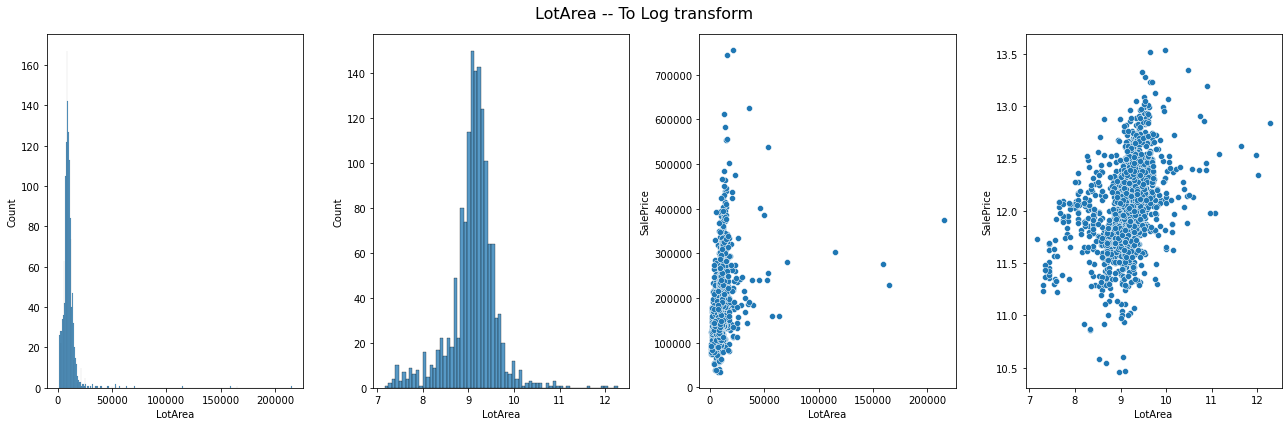

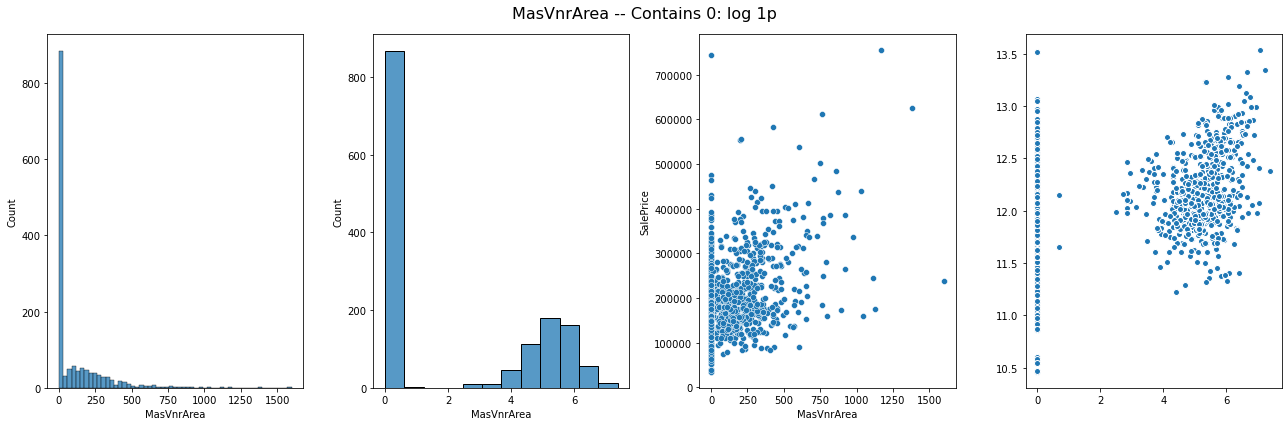

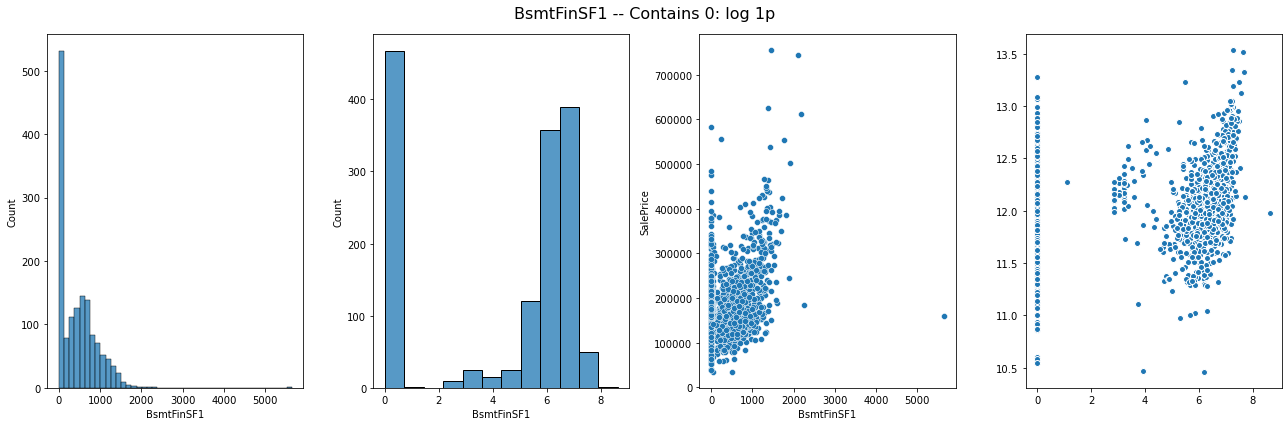

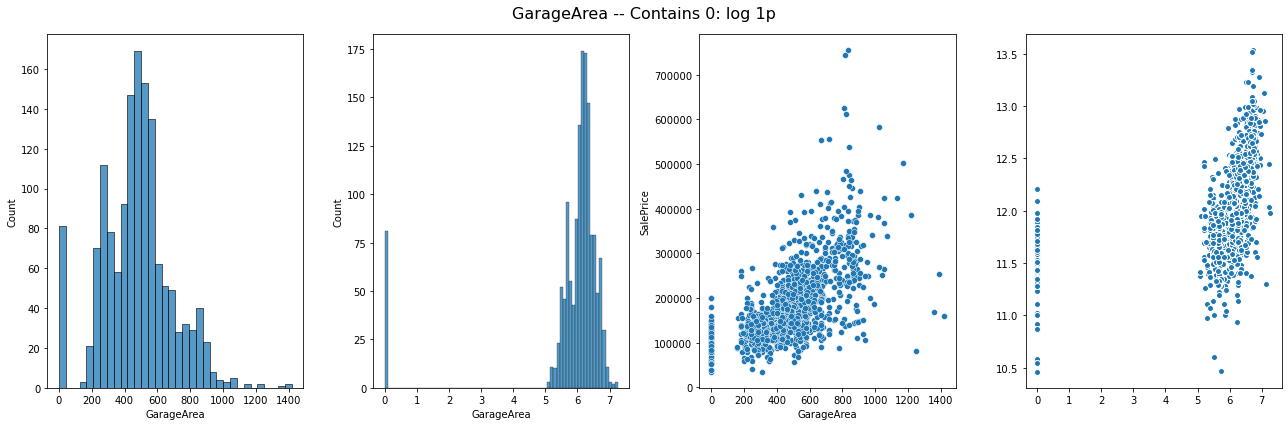

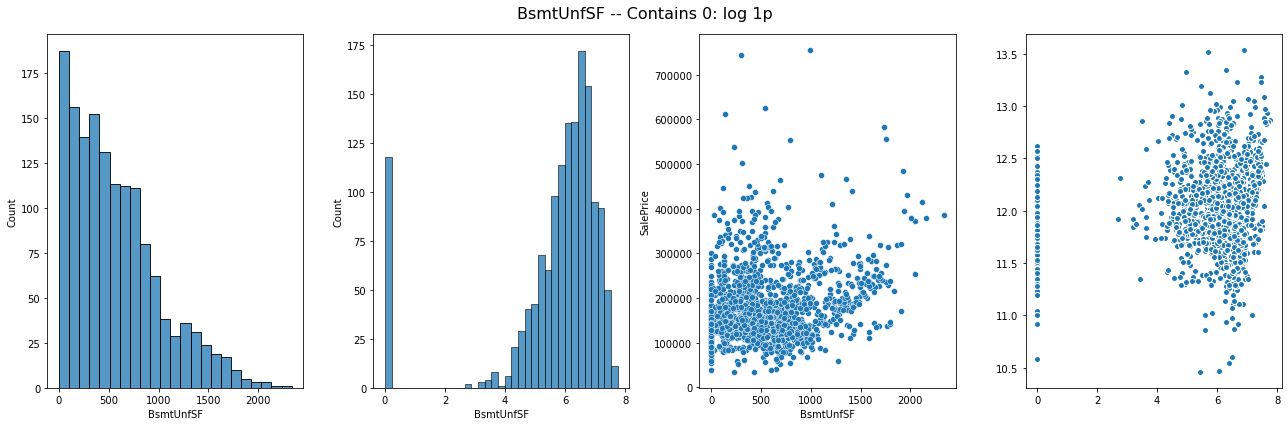

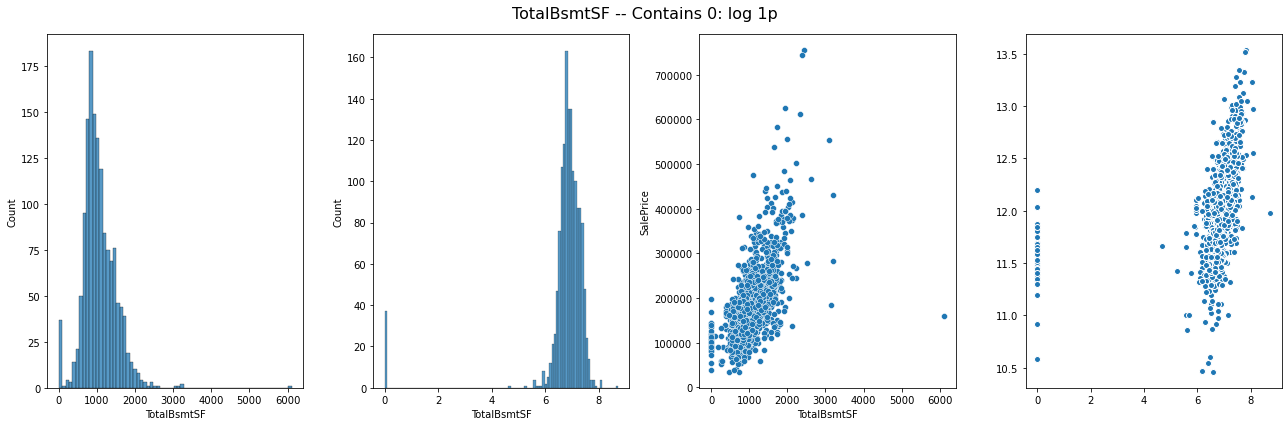

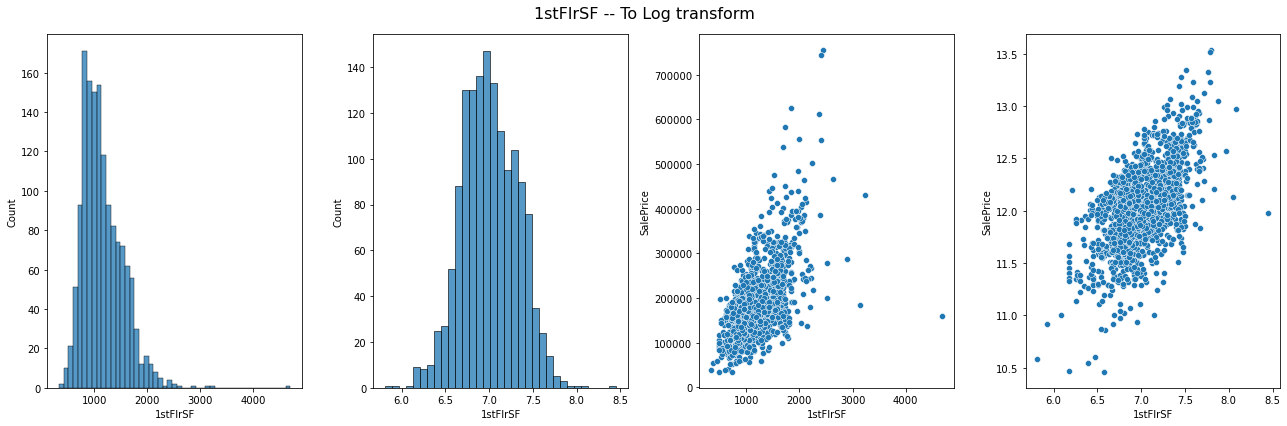

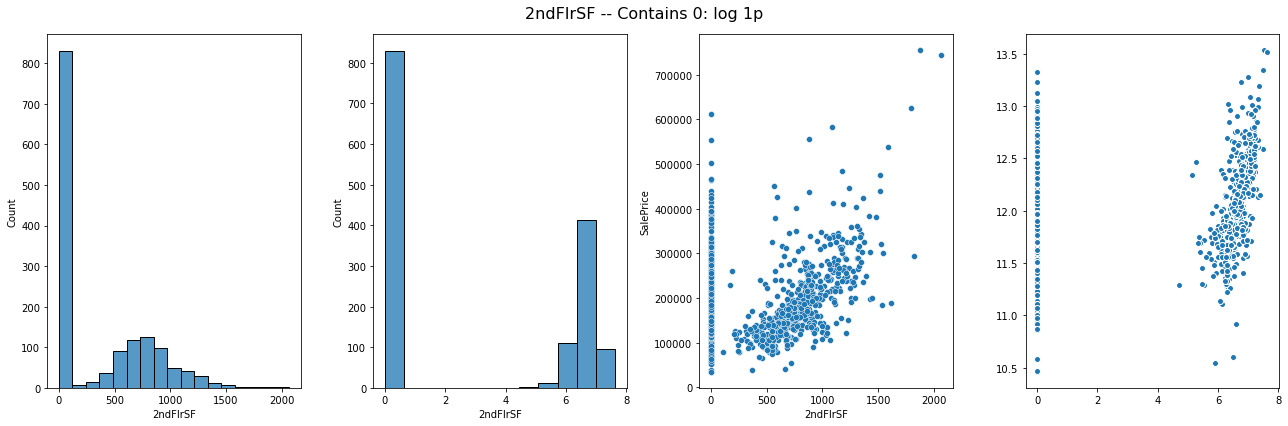

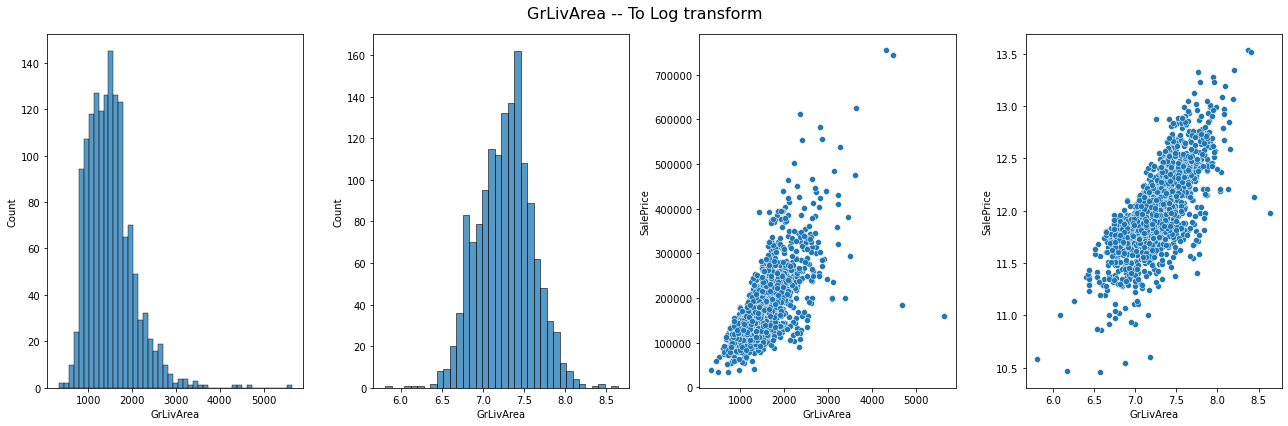

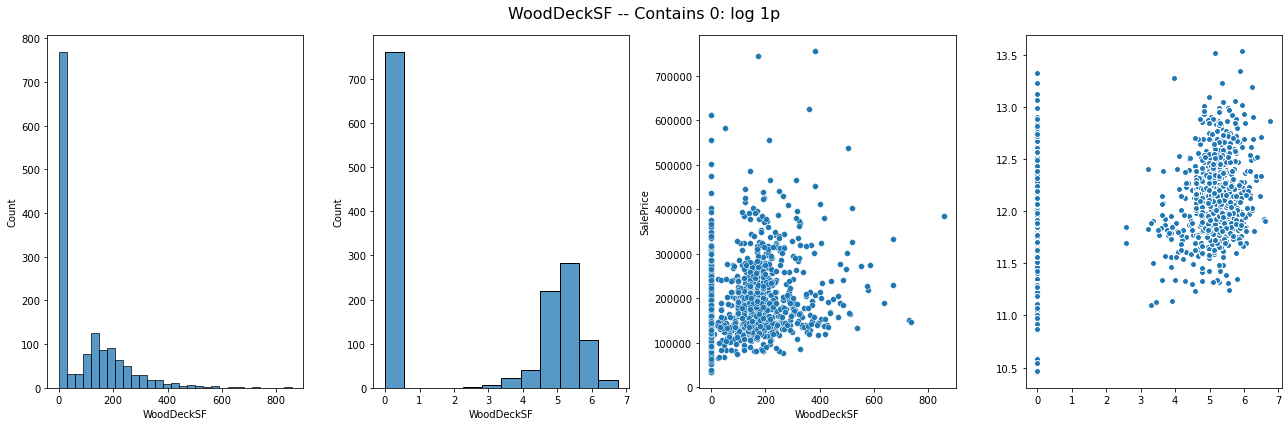

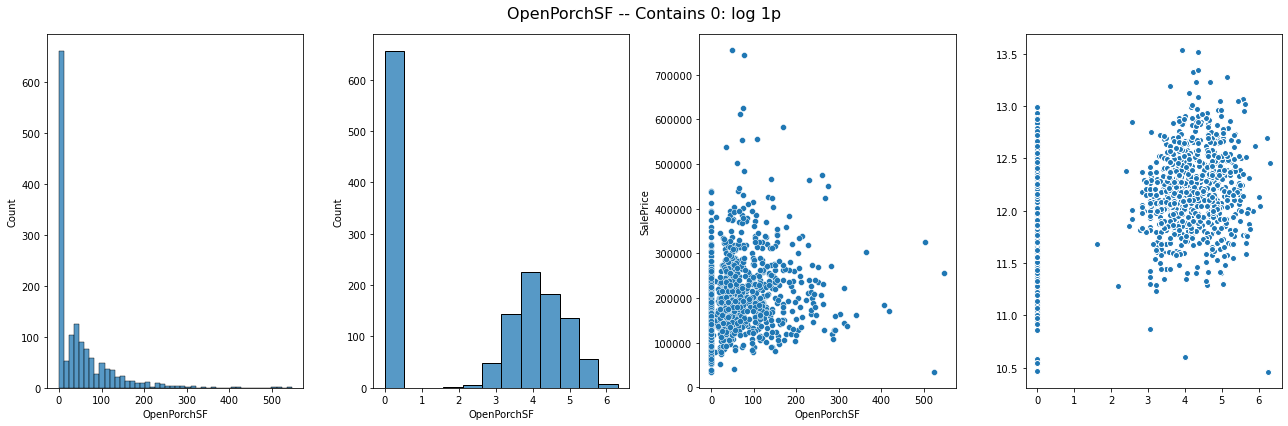

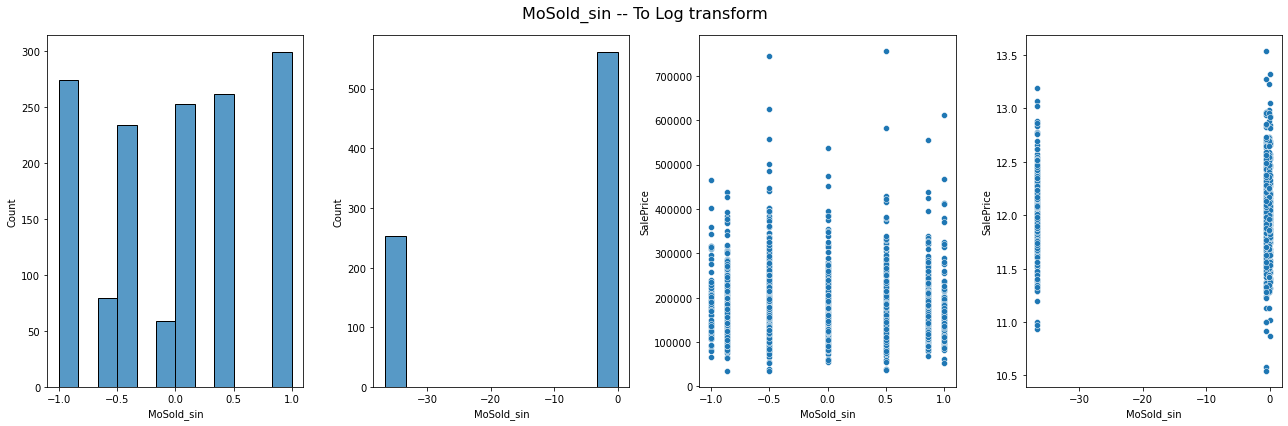

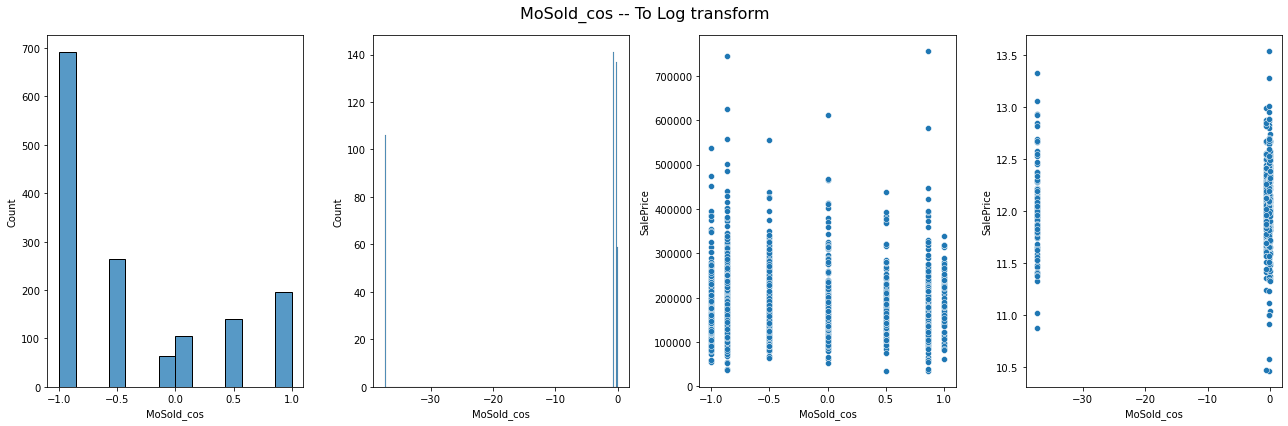

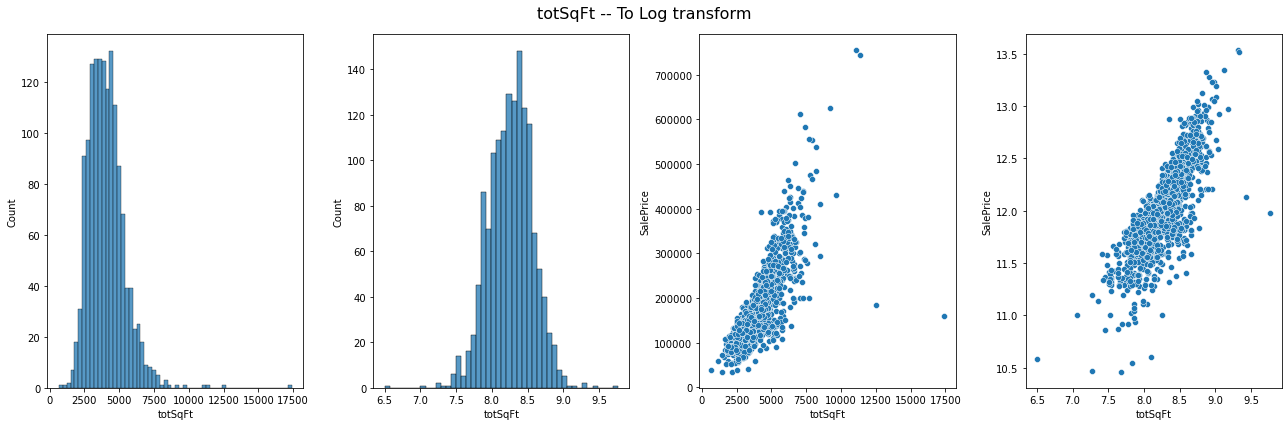

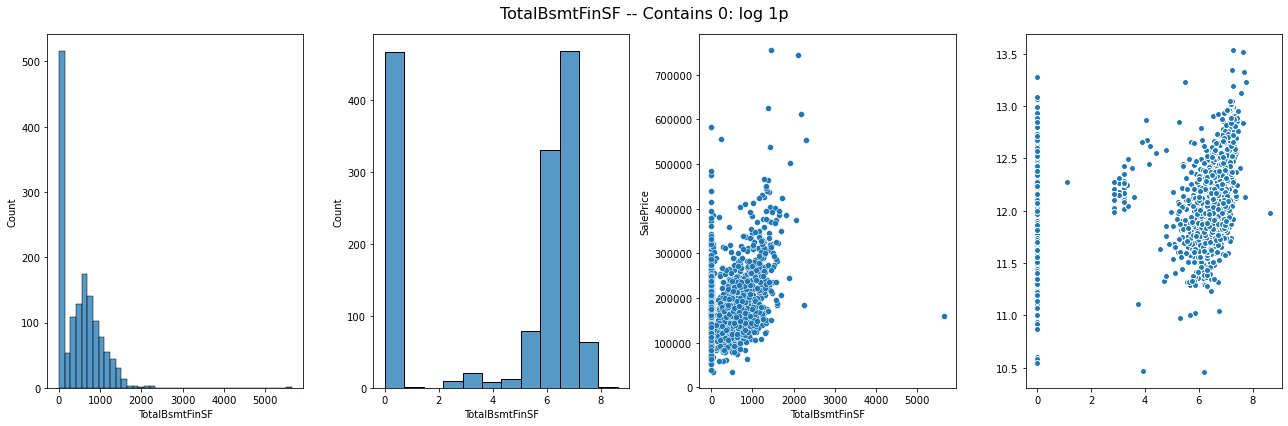

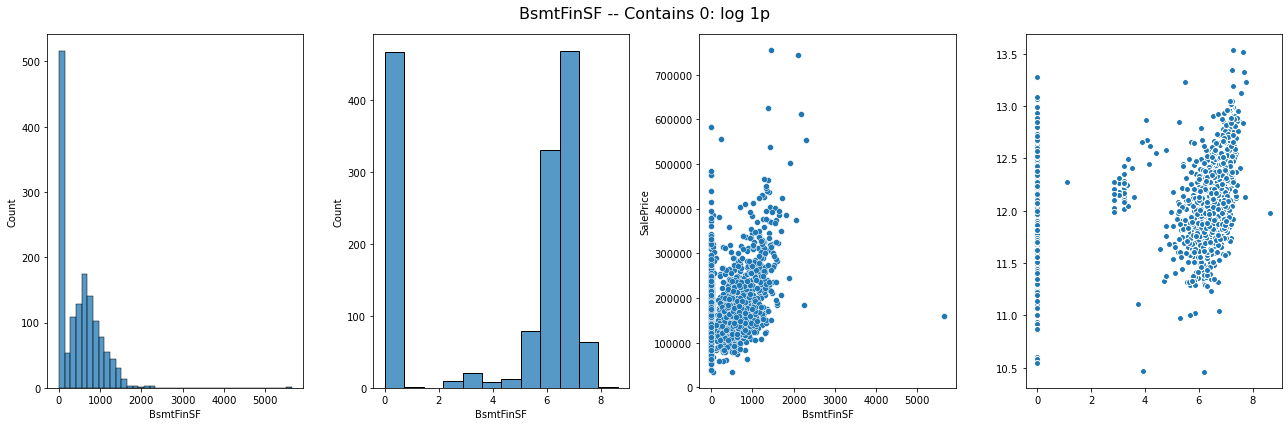

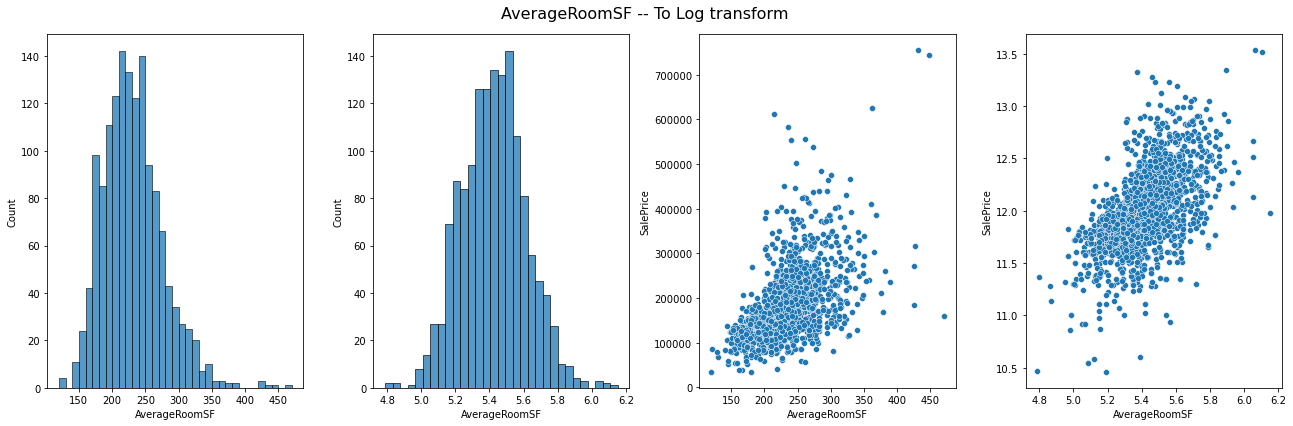

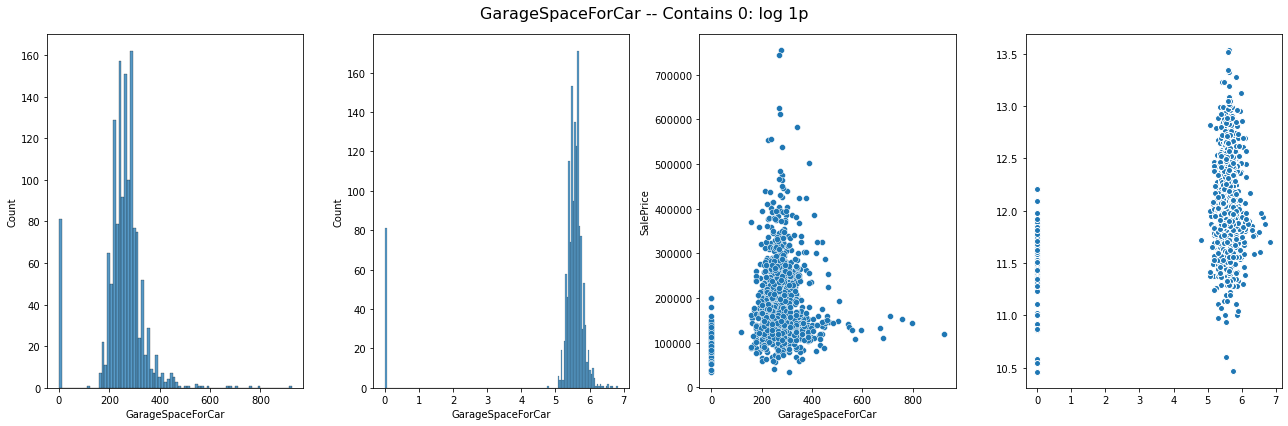

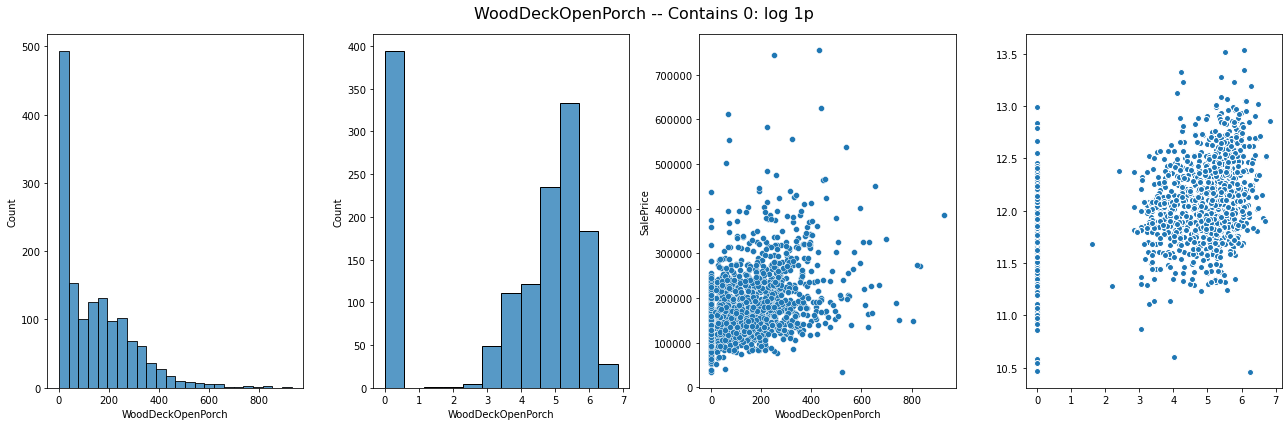

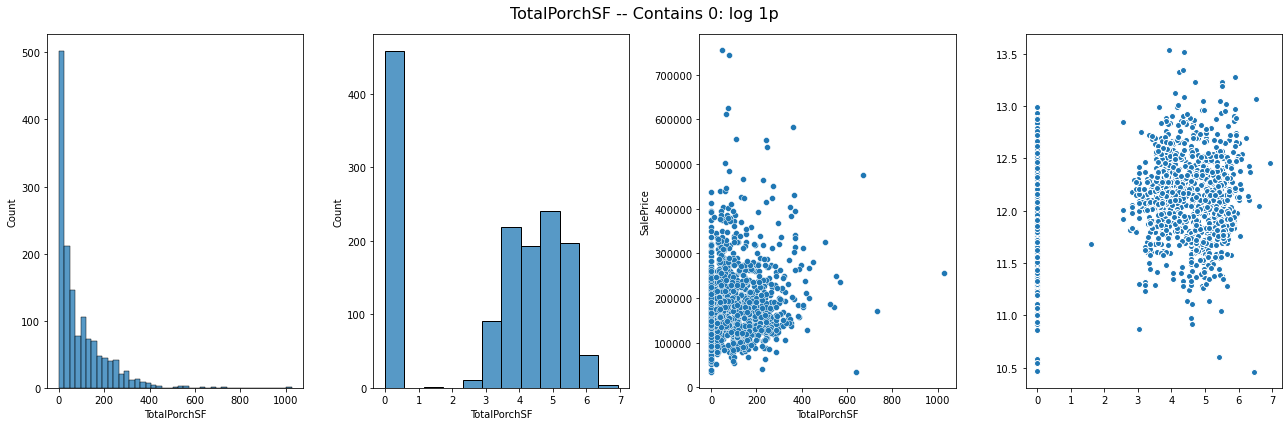

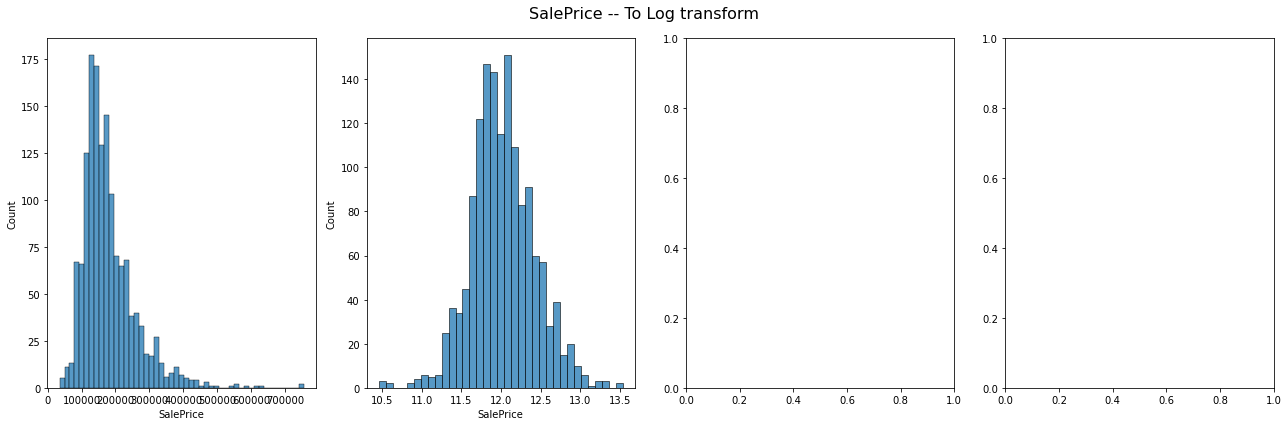

In [210]:
cols_to_log_trans, cols_with_zeros = plot_log_trans(df2, continuous2+['SalePrice'])

In [211]:
print(cols_to_log_trans)
print(cols_with_zeros)

['1stFlrSF' 'AverageRoomSF' 'GrLivArea' 'LotArea' 'SalePrice' 'totSqFt']
['MasVnrArea', 'BsmtFinSF1', 'GarageArea', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'TotalBsmtFinSF', 'BsmtFinSF', 'GarageSpaceForCar', 'WoodDeckOpenPorch', 'TotalPorchSF']


In [212]:
# ## transformation
continuous2 = np.setdiff1d(continuous2, cols_to_log_trans).tolist()

for i in cols_to_log_trans:
    df2[i + '_log'] = np.log(df2[i])
    df2.drop(i, inplace=True, axis=1)
    
    if i == 'SalePrice':
        pass
    else:
        t_df2[i + '_log'] = np.log(t_df2[i])
        t_df2.drop(i, inplace=True, axis=1)
    
    continuous2.append(i + '_log')

In [213]:
## SALE PRICE ADDED TO CONT

len(nominal2 + ordinal2 + continuous2), len(df2.columns)   

(87, 87)

In [214]:
df2.isna().sum().sum(), t_df2.isna().sum().sum()

(0, 0)

## Checkpoint3

In [215]:
df2.isna().sum().sum(), t_df2.isna().sum().sum()

(0, 0)

In [216]:
df2.shape, t_df2.shape

((1460, 87), (1459, 86))

In [217]:
nominal3 = nominal2.copy()
ordinal3 = ordinal2.copy()  ### YAERS TO ORDINAL!!!!!!!!!!!
continuous3 = continuous2.copy()

df3 = df2.copy()
t_df3 = t_df2.copy()

In [218]:
df3.head(3)

MSSubClass MSZoning Street LotShape LandContour LotConfig LandSlope  \
Id                                                                        
1           60       RL   Pave      Reg         Lvl    Inside       Gtl   
2           20       RL   Pave      Reg         Lvl       FR2       Gtl   
3           60       RL   Pave      IR1         Lvl    Inside       Gtl   

   Neighborhood Condition1 Condition2  ... 3SsnPorch_cat ScreenPorch_cat  \
Id                                     ...                                 
1       CollgCr       Norm       Norm  ...             0               0   
2       Veenker      Feedr       Norm  ...             0               0   
3       CollgCr       Norm       Norm  ...             0               0   

    MiscVal_cat  PoolArea_cat  1stFlrSF_log  AverageRoomSF_log GrLivArea_log  \
Id                                                                             
1             0             0      6.752270           5.364807      7.444249   
2             0             0      7.140453           5.348694      7.140453   
3             0             0      6.824374           5.695974      7.487734   

   LotArea_log SalePrice_log totSqFt_log  
Id                                        
1     9.041922     12.247694    8.360773  
2     9.169518     12.109011    8.239065  
3     9.328123     12.317167    8.410053  

[3 rows x 87 columns]

In [219]:
# df_.reset_index(drop=True,inplace=True)
# df_.index.name = 'Id'
# df_.head(3)

In [220]:
len(nominal3 + ordinal3 + continuous3), len(df3.columns)

(87, 87)

In [221]:
df3.isna().sum().sum(), t_df3.isna().sum().sum()

(0, 0)

## 5 Deal Outliers

In [222]:
outliers_info(df3, continuous3)

Distinct outliers:  413
Rows with outliers outliers to drop:  308
Data rows:  1460
Remaining rows:  1152


Q1         IQR           Q3  outl
2ndFlrSF             0.000000  796.200000   796.200000     1
BsmtFinSF            0.000000  879.200000   879.200000     3
BsmtFinSF1           0.000000  806.400000   806.400000     4
BsmtUnfSF          172.000000  724.000000   896.000000     6
GarageArea         295.600000  324.600000   620.200000     7
GarageSpaceForCar  220.000000   80.600000   300.600000   115
MasVnrArea           0.000000  206.200000   206.200000    54
MoSold_cos          -0.866025    1.366025     0.500000     0
MoSold_sin          -0.500000    1.366025     0.866025     0
OpenPorchSF          0.000000   83.200000    83.200000    48
TotalBsmtFinSF       0.000000  879.200000   879.200000     3
TotalBsmtSF        755.800000  635.400000  1391.200000    10
TotalPorchSF         0.000000  160.000000   160.000000    18
WoodDeckOpenPorch    0.000000  254.000000   254.000000    11
WoodDeckSF           0.000000  192.000000   192.000000    20
1stFlrSF_log         6.742881    0.558537     7.301418     2
AverageRoomSF_log    5.257495    0.317506     5.575002     6
GrLivArea_log        6.972231    0.560928     7.533159     5
LotArea_log          8.864803    0.544864     9.409667    84
SalePrice_log       11.728037    0.617798    12.345835    10
totSqFt_log          8.011355    0.503636     8.514991     6

In [223]:
to_remove_outliers = continuous3.copy()
to_remove_outliers.remove('GarageSpaceForCar')
np.asarray(to_remove_outliers)

array(['2ndFlrSF', 'BsmtFinSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea',
       'MasVnrArea', 'MoSold_cos', 'MoSold_sin', 'OpenPorchSF',
       'TotalBsmtFinSF', 'TotalBsmtSF', 'TotalPorchSF',
       'WoodDeckOpenPorch', 'WoodDeckSF', '1stFlrSF_log',
       'AverageRoomSF_log', 'GrLivArea_log', 'LotArea_log',
       'SalePrice_log', 'totSqFt_log'], dtype='<U17')

In [224]:
outliers_info(df3, to_remove_outliers)

Distinct outliers:  298
Rows with outliers outliers to drop:  208
Data rows:  1460
Remaining rows:  1252


Q1         IQR           Q3  outl
2ndFlrSF             0.000000  796.200000   796.200000     1
BsmtFinSF            0.000000  879.200000   879.200000     3
BsmtFinSF1           0.000000  806.400000   806.400000     4
BsmtUnfSF          172.000000  724.000000   896.000000     6
GarageArea         295.600000  324.600000   620.200000     7
MasVnrArea           0.000000  206.200000   206.200000    54
MoSold_cos          -0.866025    1.366025     0.500000     0
MoSold_sin          -0.500000    1.366025     0.866025     0
OpenPorchSF          0.000000   83.200000    83.200000    48
TotalBsmtFinSF       0.000000  879.200000   879.200000     3
TotalBsmtSF        755.800000  635.400000  1391.200000    10
TotalPorchSF         0.000000  160.000000   160.000000    18
WoodDeckOpenPorch    0.000000  254.000000   254.000000    11
WoodDeckSF           0.000000  192.000000   192.000000    20
1stFlrSF_log         6.742881    0.558537     7.301418     2
AverageRoomSF_log    5.257495    0.317506     5.575002     6
GrLivArea_log        6.972231    0.560928     7.533159     5
LotArea_log          8.864803    0.544864     9.409667    84
SalePrice_log       11.728037    0.617798    12.345835    10
totSqFt_log          8.011355    0.503636     8.514991     6

In [225]:
Q1_ = df3[to_remove_outliers].quantile(0.2)
Q3_ = df3[to_remove_outliers].quantile(0.8)
IQR_ = Q3_ - Q1_

In [226]:
df3 = df3[~((df3 < (Q1_ - 1.5 * IQR_)) | (df3 > (Q3_ + 1.5 * IQR_))).any(axis=1)]
df3.shape

(1252, 87)

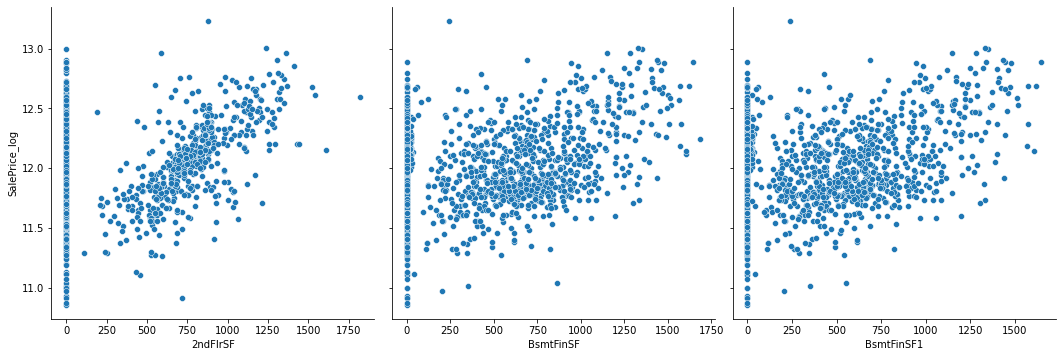

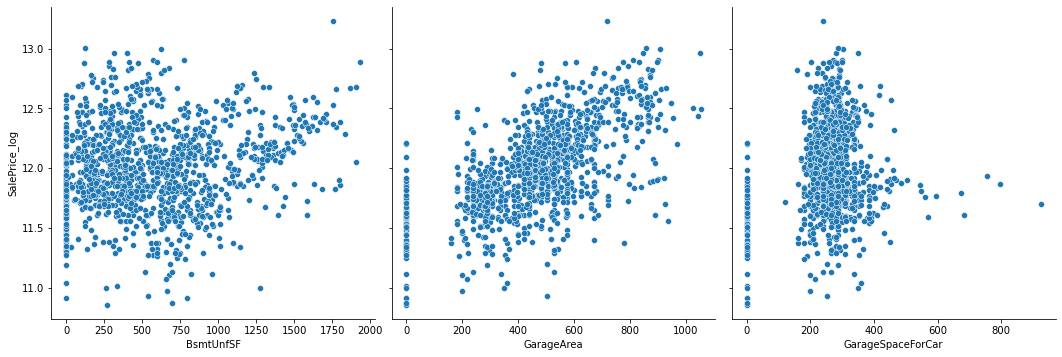

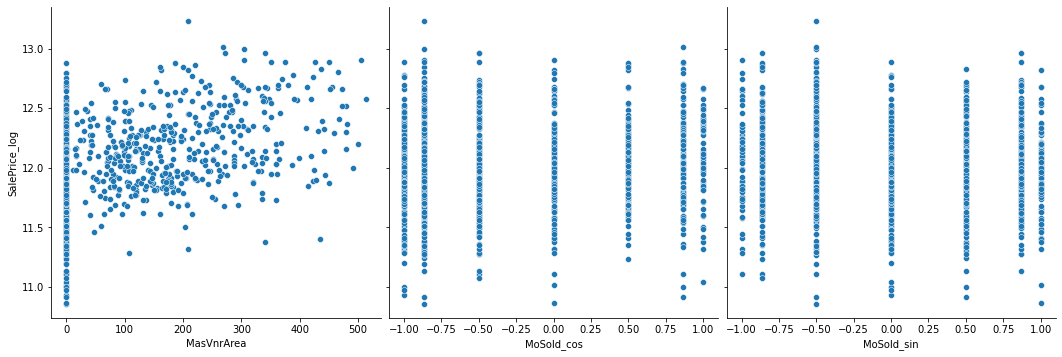

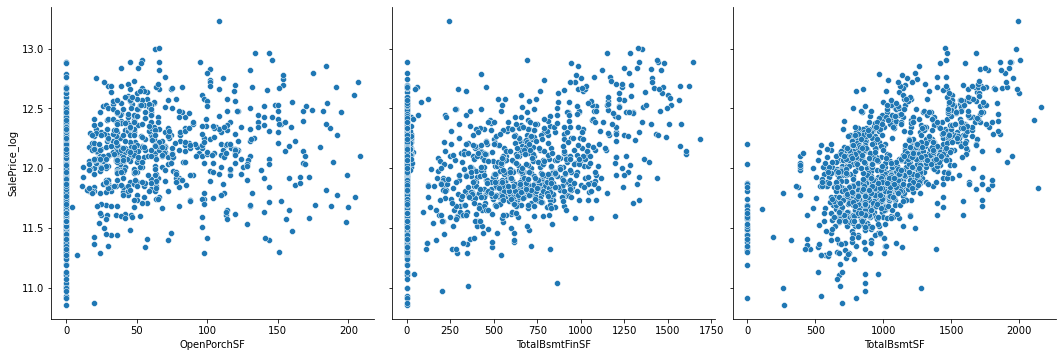

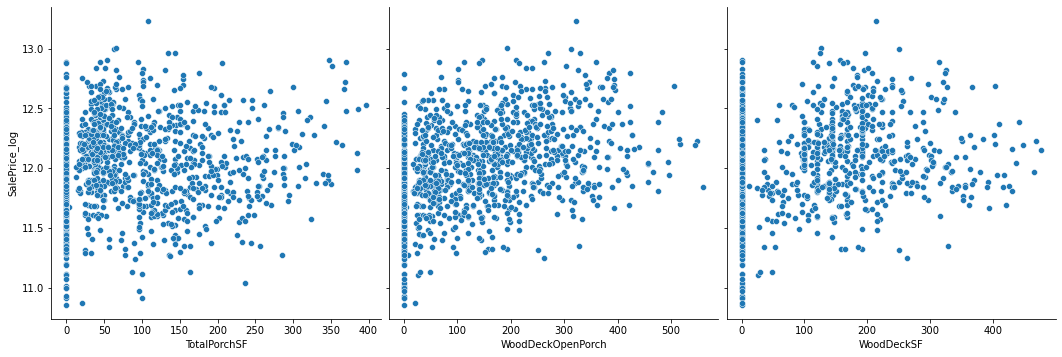

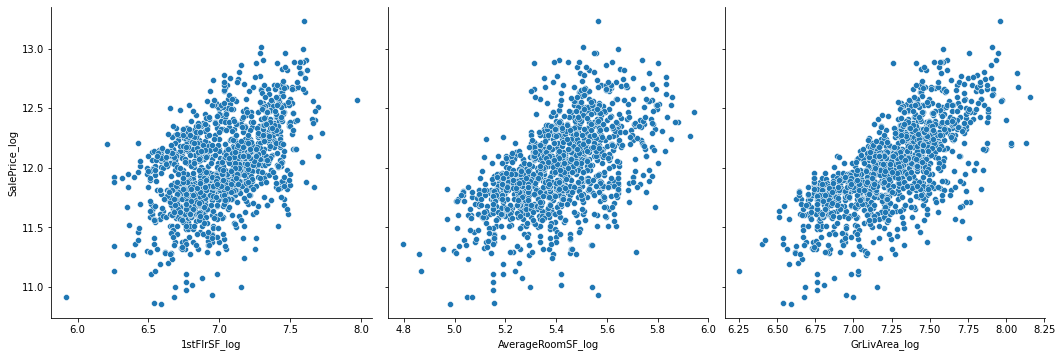

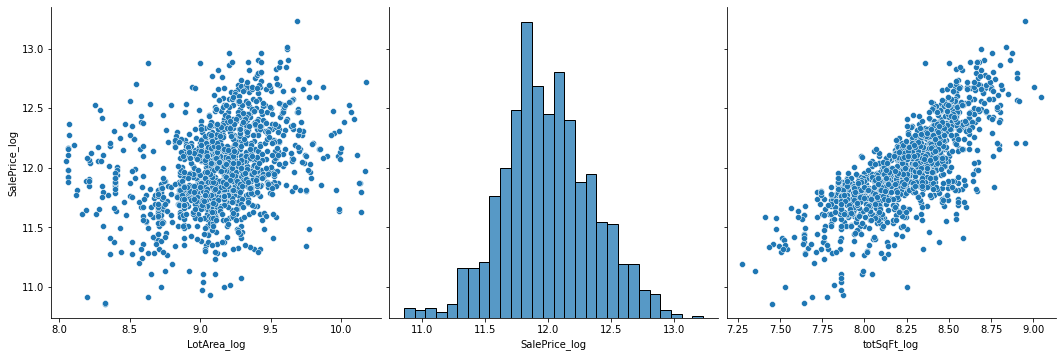

In [490]:
for i in range(0, len(continuous3 ), 3):
    sns.pairplot(data=df3,
                      y_vars=['SalePrice_log'],
                      x_vars=(continuous3)[i:i+3],
                         height=5, aspect=1)

In [227]:
len(nominal3 + ordinal3 + continuous3 ), len(df3.columns)

(87, 87)

In [491]:
# outl = ((df[continuous] < (Q1[continuous] - 1.5 * IQR[continuous])) | (df[continuous] > (Q3[continuous] + 1.5 * IQR[continuous]))).sum()
# outl1 = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [492]:
# len(outl1.loc[outl1 != 0])

In [493]:
# q = pd.concat([Q1, IQR, Q3], axis=1)
# q.columns = ['Q1', 'IQR', 'Q3']
# q['outl'] = outl
# q['outl1'] = outl1
# q

In [494]:
# s=0
# for i in continuous:
#     ou = ((df[i] < (Q1[i] - 1.5 * IQR[i])) | (df[i] > (Q3[i] + 1.5 * IQR[i]))).sum()
#     print(i, '- number of outliers: ', ou)
#     s+=ou
# print('Total number of outliers:', s)
# print('Real number of outliers:', df.shape[0] - df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)].shape[0])

In [495]:
# df_ou = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_ou.shape

In [190]:
# plt.hist(df_ou['LotArea'], bins=50);

## Checkpoint4

In [228]:
df3.isna().sum().sum(), t_df3.isna().sum().sum()

(0, 0)

In [229]:
df3.shape, t_df3.shape

((1252, 87), (1459, 86))

In [230]:
nominal4 = nominal3.copy()
ordinal4 = ordinal3.copy()  ### YAERS TO ORDINAL!!!!!!!!!!!
continuous4 = continuous3.copy()

df4 = df3.copy()
t_df4 = t_df3.copy()

In [231]:
df4.head(3)

MSSubClass MSZoning Street LotShape LandContour LotConfig LandSlope  \
Id                                                                        
1           60       RL   Pave      Reg         Lvl    Inside       Gtl   
2           20       RL   Pave      Reg         Lvl       FR2       Gtl   
3           60       RL   Pave      IR1         Lvl    Inside       Gtl   

   Neighborhood Condition1 Condition2  ... 3SsnPorch_cat ScreenPorch_cat  \
Id                                     ...                                 
1       CollgCr       Norm       Norm  ...             0               0   
2       Veenker      Feedr       Norm  ...             0               0   
3       CollgCr       Norm       Norm  ...             0               0   

    MiscVal_cat  PoolArea_cat  1stFlrSF_log  AverageRoomSF_log GrLivArea_log  \
Id                                                                             
1             0             0      6.752270           5.364807      7.444249   
2             0             0      7.140453           5.348694      7.140453   
3             0             0      6.824374           5.695974      7.487734   

   LotArea_log SalePrice_log totSqFt_log  
Id                                        
1     9.041922     12.247694    8.360773  
2     9.169518     12.109011    8.239065  
3     9.328123     12.317167    8.410053  

[3 rows x 87 columns]

In [232]:
# df_.reset_index(drop=True,inplace=True)
# df_.index.name = 'Id'
# df_.head(3)

In [233]:
len(nominal4 + ordinal4 + continuous4), len(df4.columns)

(87, 87)

In [234]:
df4.isna().sum().sum(), t_df4.isna().sum().sum()

(0, 0)

## 6 Encoding Ordinal Columns

### Nominal

In [235]:
df4[nominal4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 1 to 1459
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MSZoning           1252 non-null   object
 1   Street             1252 non-null   object
 2   LandContour        1252 non-null   object
 3   LotConfig          1252 non-null   object
 4   Neighborhood       1252 non-null   object
 5   Condition1         1252 non-null   object
 6   Condition2         1252 non-null   object
 7   BldgType           1252 non-null   object
 8   HouseStyle         1252 non-null   object
 9   RoofStyle          1252 non-null   object
 10  RoofMatl           1252 non-null   object
 11  Exterior1st        1252 non-null   object
 12  Exterior2nd        1252 non-null   object
 13  MasVnrType         1252 non-null   object
 14  Foundation         1252 non-null   object
 15  Heating            1252 non-null   object
 16  CentralAir         1252 non-null   object


In [236]:
df4[nominal4] = df4[nominal4].astype('category')
t_df4[nominal4] = t_df4[nominal4].astype('category')

In [237]:
df4[nominal4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 1 to 1459
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MSZoning           1252 non-null   category
 1   Street             1252 non-null   category
 2   LandContour        1252 non-null   category
 3   LotConfig          1252 non-null   category
 4   Neighborhood       1252 non-null   category
 5   Condition1         1252 non-null   category
 6   Condition2         1252 non-null   category
 7   BldgType           1252 non-null   category
 8   HouseStyle         1252 non-null   category
 9   RoofStyle          1252 non-null   category
 10  RoofMatl           1252 non-null   category
 11  Exterior1st        1252 non-null   category
 12  Exterior2nd        1252 non-null   category
 13  MasVnrType         1252 non-null   category
 14  Foundation         1252 non-null   category
 15  Heating            1252 non-null   category
 16  Centra

### Ordinal

In [238]:
df4[ordinal4].dtypes

MSSubClass        int64
LotShape         object
LandSlope        object
OverallQual       int64
OverallCond       int64
ExterQual        object
ExterCond        object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
HeatingQC        object
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Fireplaces        int64
GarageFinish     object
GarageCars        int64
GarageQual       object
GarageCond       object
PavedDrive       object
YearBuilt         int64
YearRemodAdd      int64
GarageYrBlt     float64
YrSold            int64
AgeWhenSold       int64
totBath         float64
OtherRooms        int64
dtype: object

In [242]:
qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
             'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

l =['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
oe1 = OrdinalEncoder(categories = [l for i in qual_vars])
df4[qual_vars] = oe1.fit_transform(df4[qual_vars])
df4[qual_vars]

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
Id                                                                       
1           4.0        3.0       4.0       3.0        5.0          4.0   
2           3.0        3.0       4.0       3.0        5.0          3.0   
3           4.0        3.0       4.0       3.0        5.0          4.0   
4           3.0        3.0       3.0       4.0        4.0          4.0   
5           4.0        3.0       4.0       3.0        5.0          4.0   
...         ...        ...       ...       ...        ...          ...   
1455        4.0        3.0       4.0       3.0        5.0          4.0   
1456        3.0        3.0       4.0       3.0        5.0          3.0   
1457        3.0        3.0       4.0       3.0        3.0          3.0   
1458        5.0        4.0       3.0       4.0        5.0          4.0   
1459        3.0        3.0       3.0       3.0        4.0          4.0   

      GarageQual  GarageCond  
Id                            
1            3.0         3.0  
2            3.0         3.0  
3            3.0         3.0  
4            3.0         3.0  
5            3.0         3.0  
...          ...         ...  
1455         3.0         3.0  
1456         3.0         3.0  
1457         3.0         3.0  
1458         3.0         3.0  
1459         3.0         3.0  

[1252 rows x 8 columns]

In [244]:
t_df4[qual_vars] = oe1.transform(t_df4[qual_vars])
t_df4[qual_vars].head(5)

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
Id                                                                       
1461        3.0        3.0       3.0       3.0        3.0          3.0   
1462        3.0        3.0       3.0       3.0        3.0          4.0   
1463        3.0        3.0       4.0       3.0        4.0          3.0   
1464        3.0        3.0       3.0       3.0        5.0          4.0   
1465        4.0        3.0       4.0       3.0        5.0          4.0   

      GarageQual  GarageCond  
Id                            
1461         3.0         3.0  
1462         3.0         3.0  
1463         3.0         3.0  
1464         3.0         3.0  
1465         3.0         3.0

In [245]:
to_encode_cols = df4[ordinal4].select_dtypes('object').columns
enc_rules = [
    ['IR3','IR2','IR1','Reg'],
    ['Gtl', 'Mod', 'Sev'],
    ['NA', 'No', 'Mn', 'Av', 'Gd'],
    ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    ['NA','Unf','RFn','Fin'],
    ['N', 'P', 'Y'] 
]
enc_rules_dict = dict(zip(to_encode_cols, enc_rules))

In [247]:
oe2 = OrdinalEncoder(categories = enc_rules)
df4[to_encode_cols] = oe2.fit_transform(df4[to_encode_cols])
df4[to_encode_cols]

LotShape  LandSlope  BsmtExposure  BsmtFinType1  BsmtFinType2  \
Id                                                                    
1          3.0        0.0           1.0           6.0           1.0   
2          3.0        0.0           4.0           5.0           1.0   
3          2.0        0.0           2.0           6.0           1.0   
4          2.0        0.0           1.0           5.0           1.0   
5          2.0        0.0           3.0           6.0           1.0   
...        ...        ...           ...           ...           ...   
1455       3.0        0.0           1.0           6.0           1.0   
1456       3.0        0.0           1.0           1.0           1.0   
1457       3.0        0.0           1.0           5.0           3.0   
1458       3.0        0.0           1.0           6.0           1.0   
1459       3.0        0.0           2.0           6.0           3.0   

      GarageFinish  PavedDrive  
Id                              
1              2.0         2.0  
2              2.0         2.0  
3              2.0         2.0  
4              1.0         2.0  
5              2.0         2.0  
...            ...         ...  
1455           2.0         2.0  
1456           2.0         2.0  
1457           1.0         2.0  
1458           2.0         2.0  
1459           1.0         2.0  

[1252 rows x 7 columns]

In [248]:
t_df4[to_encode_cols] = oe2.transform(t_df4[to_encode_cols])
t_df4[to_encode_cols].head(5)

LotShape  LandSlope  BsmtExposure  BsmtFinType1  BsmtFinType2  \
Id                                                                    
1461       3.0        0.0           1.0           3.0           2.0   
1462       2.0        0.0           1.0           5.0           1.0   
1463       2.0        0.0           1.0           6.0           1.0   
1464       2.0        0.0           1.0           6.0           1.0   
1465       2.0        0.0           1.0           5.0           1.0   

      GarageFinish  PavedDrive  
Id                              
1461           1.0         2.0  
1462           1.0         2.0  
1463           3.0         2.0  
1464           3.0         2.0  
1465           2.0         2.0

In [249]:
df4[ordinal4].dtypes

MSSubClass        int64
LotShape        float64
LandSlope       float64
OverallQual       int64
OverallCond       int64
ExterQual       float64
ExterCond       float64
BsmtQual        float64
BsmtCond        float64
BsmtExposure    float64
BsmtFinType1    float64
BsmtFinType2    float64
HeatingQC       float64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual     float64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageFinish    float64
GarageCars        int64
GarageQual      float64
GarageCond      float64
PavedDrive      float64
YearBuilt         int64
YearRemodAdd      int64
GarageYrBlt     float64
YrSold            int64
AgeWhenSold       int64
totBath         float64
OtherRooms        int64
dtype: object

In [250]:
set(ordinal4+ nominal4 + continuous4) == set(df4.columns)

True

## Save 1 step data 

In [251]:
df4.isna().sum().sum(), t_df4.isna().sum().sum()

(0, 0)

In [253]:
df4.shape, t_df4.shape

((1252, 87), (1459, 86))

In [252]:
df4.to_csv('./data/train_df_step1.csv', index_label= 'Id')
t_df4.to_csv('./data/test_df_step1.csv', index_label= 'Id')

In [518]:
np.asarray(nominal4)

array(['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
       'GarageType', 'SaleType', 'SaleCondition', 'RenovatedY/N',
       '2ndFloorY/N', 'PorchY/N', 'BsmtFinSF2_cat', 'LowQualFinSF_cat',
       'EnclosedPorch_cat', '3SsnPorch_cat', 'ScreenPorch_cat',
       'MiscVal_cat', 'PoolArea_cat'], dtype='<U17')

In [519]:
np.asarray(ordinal4)

array(['MSSubClass', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'YrSold', 'AgeWhenSold', 'totBath', 'OtherRooms'],
      dtype='<U12')

In [520]:
np.asarray(continuous4)

array(['2ndFlrSF', 'BsmtFinSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea',
       'GarageSpaceForCar', 'MasVnrArea', 'MoSold_cos', 'MoSold_sin',
       'OpenPorchSF', 'TotalBsmtFinSF', 'TotalBsmtSF', 'TotalPorchSF',
       'WoodDeckOpenPorch', 'WoodDeckSF', '1stFlrSF_log',
       'AverageRoomSF_log', 'GrLivArea_log', 'LotArea_log',
       'SalePrice_log', 'totSqFt_log'], dtype='<U17')

## 7 Relationships between variables

### 7.1 Analysis of Variation (ANOVA)

In [173]:
# ### ordinal and nominal data VS continious

# ## 1

# def anova(frame):
#     anv = pd.DataFrame()
#     anv['feature'] = nominal1 #+ ordinal1
#     pvals = []
#     for c in (nominal1):
# #         print(c)
#         samples = []
#         for cls in frame[c].unique():
#             s = frame[frame[c] == cls]['SalePrice'].values
#             samples.append(s)
# #             print(s)
#         pval = stats.f_oneway(*samples)[1] 
#         pvals.append(pval)
#     anv['pval'] = pvals
#     return anv.sort_values('pval')

# a = anova(df_)
# a['disparity'] = np.log(1./a['pval'].values)
# a.head(7)

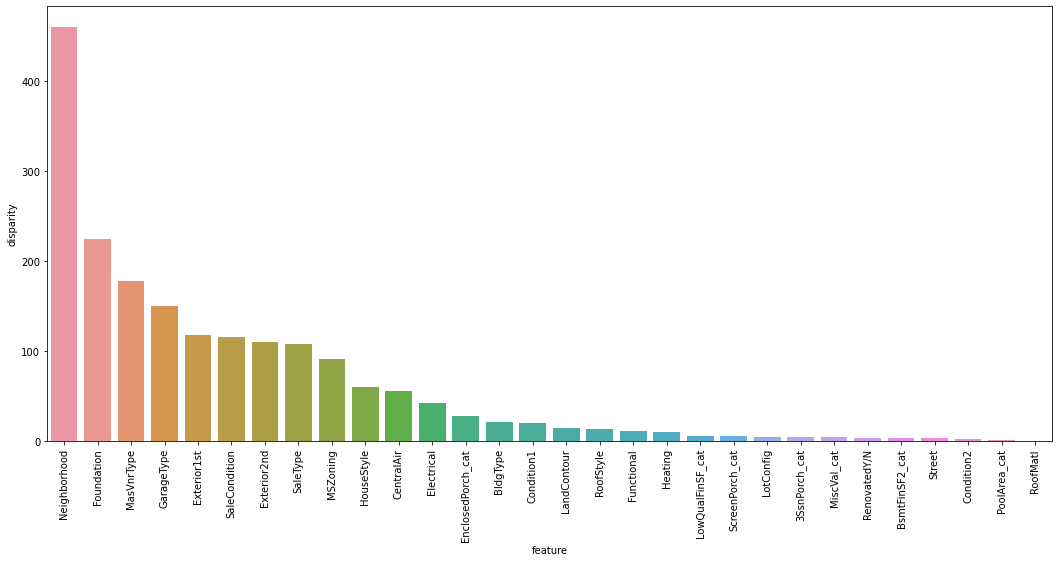

In [171]:
plt.figure(figsize=(18, 8))
sns.barplot(data=a[:], x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.show()

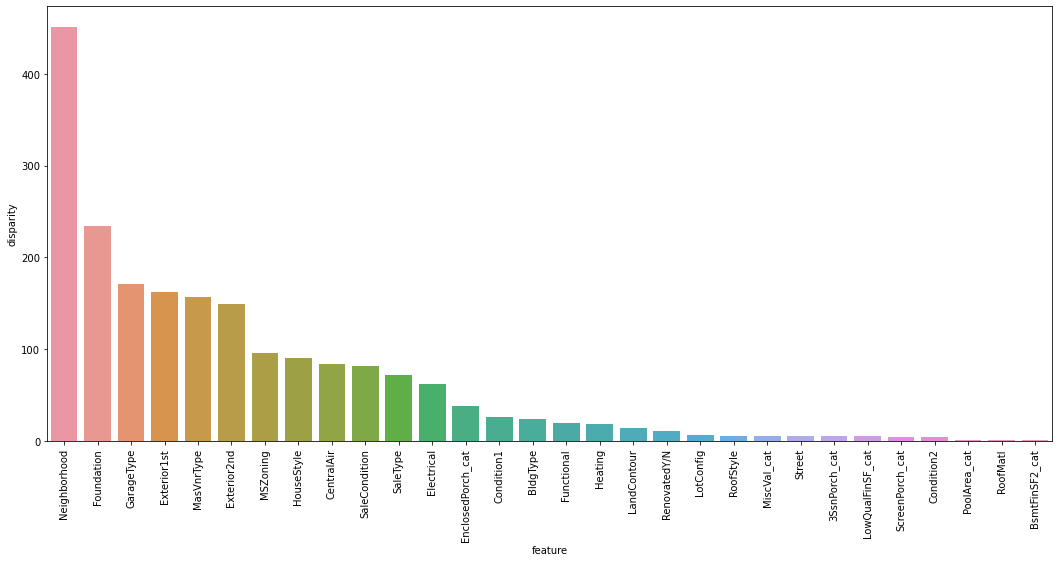